# Notebook for the paper: MM with informed and uninformed traders

#### models parameters

In [1]:
import pickle

params_env = {'k': 1, 'phi': 0.1, 'alpha': 0.001, 'q_bar': 50, 'T': 1,
              'N_t': 1000, 'N_u': 100, 'U_max': 10, 'sigma': 1, 'eta': 10, 'qconst': 0.6,
              'mu': 0, 'Q_0': 0, 'X_0': 0, 'S_0': 100, 'U_0': 0, 
              'varphi': 15, 'total_arrivals': 30,
              'gamma': 1,
              'matrixCJ': []}

with open('src/params_env.pkl', 'wb') as f:
    pickle.dump(params_env, f)    

In [2]:
import pickle

with open('src/params_env.pkl', 'rb') as f:
    params_env = pickle.load(f)    

In [3]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable


In [4]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
%config InlineBackend.figure_format = "retina"

import matplotlib
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath,amsfonts}')


In [5]:
import src.utils as utils
from importlib import reload

In [6]:
reload(utils)

<module 'src.utils' from '/Users/adrien/Documents/GitHub/MM-with-fads/src/utils.py'>

In [7]:
mm = utils.mm_with_fads(**params_env)

## Plots

In [8]:
fs = 15 # tick fontsize
fsL = fs + 3 # Latex fontsize
dpi = 300

### Changing the value of $\mathfrak{q}$

In [9]:
mm_qconst = {'q0': mm, 'q1': mm, 'q2':mm}

In [10]:
q_const_values = np.array([0.3,0.6,0.9])
Naux = len(q_const_values)

for iq, qconst_value in enumerate(q_const_values):
    params_aux = params_env.copy()
    params_aux['qconst'] = qconst_value
    mm_aux = utils.mm_with_fads(**params_aux)
    mm_qconst[f'q{iq}'] = mm_aux
    

In [11]:
plt.rcParams["font.size"] = fs

3it [00:09,  3.04s/it]


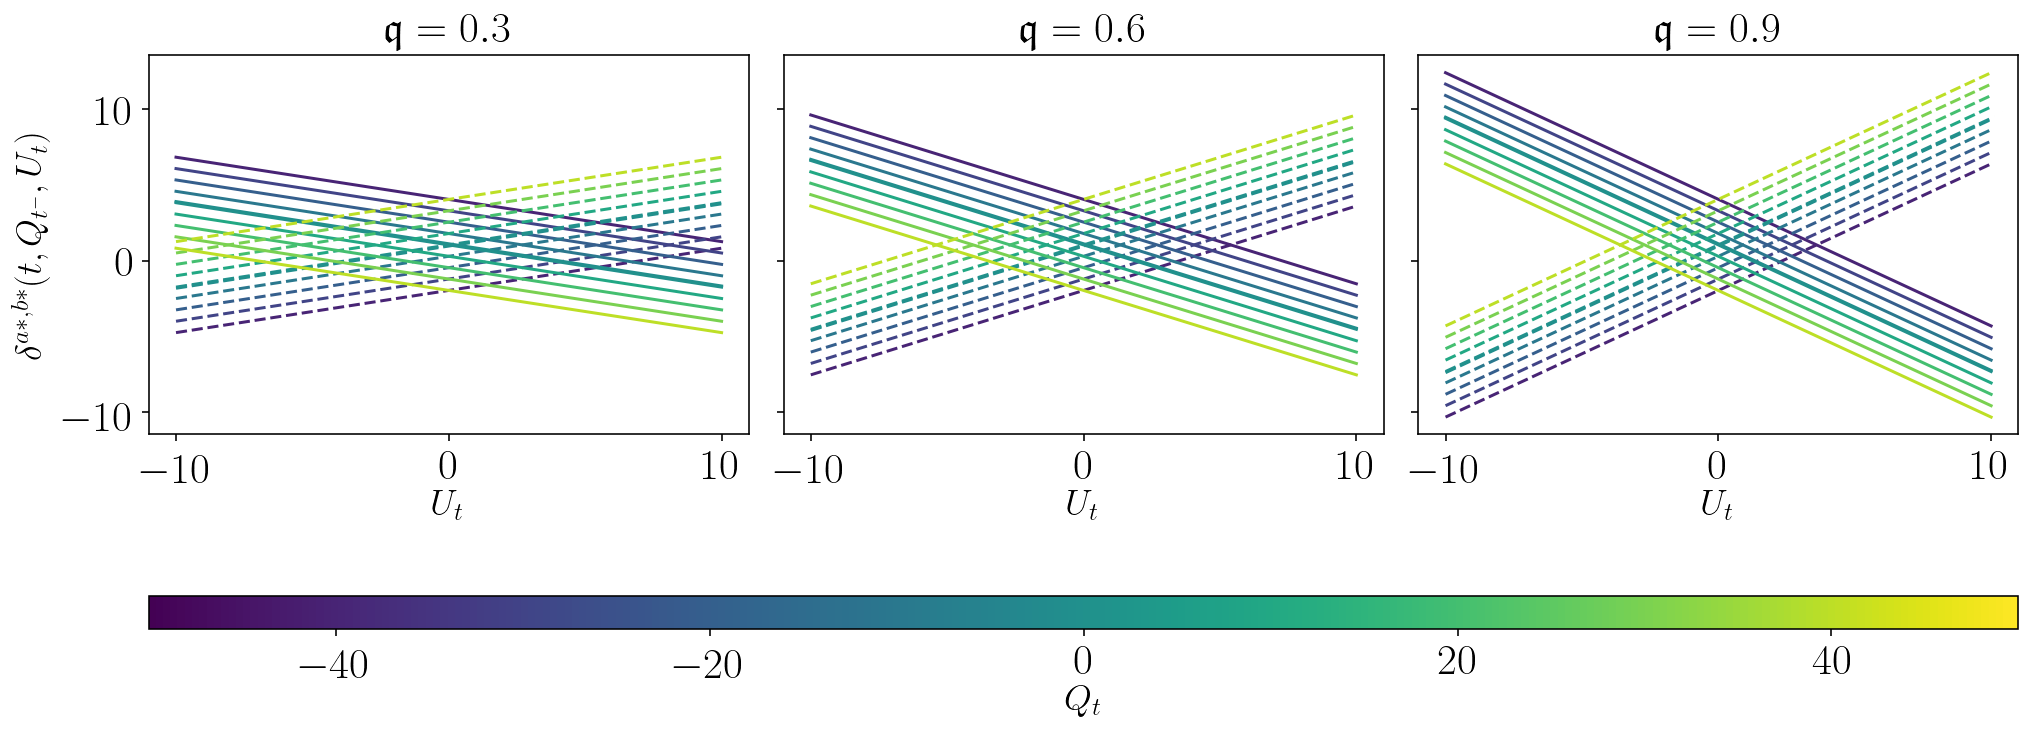

In [12]:
fig, ax = plt.subplots(1, Naux, figsize=(14, 5), sharey=True, constrained_layout=True)
cmap = plt.get_cmap("viridis")
norm = Normalize(vmin=min(mm.q_vector), vmax=max(mm.q_vector))
sm = ScalarMappable(norm=norm, cmap=cmap)

for iq, qconst_value in tqdm(enumerate(q_const_values)):
    delta_a_m, delta_b_m, delta_a___m, delta_b___m = mm_qconst[f'q{iq}'].get_deltas_FI()
    for q in range(1,len(mm.q_vector)-1):
        if q%int(mm.q_bar/5) ==0 or q ==mm.q_bar-1:
            color = cmap(norm(mm.q_vector[q]))
            ax[iq].plot(mm.u_vector, delta_a_m[int(mm.N_t / 2), :, q], '-', color=color)
            ax[iq].plot(mm.u_vector, delta_b_m[int(mm.N_t / 2), :, q], '--', color=color)

            
    # Personnalisation des axes
for i in range(Naux):
    ax[i].set_xlabel(r'${U}_t$', fontsize = fsL )
    #ax[i].set_ylim(-1, 3)
    #ax[i].set_xlim(-2,2)
    qconst_aux = q_const_values[i]
    ax[i].set_title(fr'$\mathfrak q = {qconst_aux}$')
ax[0].set_ylabel(r'$\delta^{a*,b*}(t,Q_{t^-},{U}_t)$', fontsize = fsL)
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.05, pad=0.08)
cbar.set_label(r'$Q_t$', fontsize = fsL)
plt.savefig('figures/deltas_u.pdf', format="pdf", dpi=dpi)
plt.show()


## Changing the value of $\gamma$

In [13]:
mm_gamma = {'gamma0': mm, 'gamma1': mm, 'gamma2':mm}

In [14]:
gamma_values = np.array([0.1,1.,10.])
Naux = len(gamma_values)

for iq, gamma_value in enumerate(gamma_values):
    params_aux = params_env.copy()
    params_aux['gamma'] = gamma_value
    mm_aux = utils.mm_with_fads(**params_aux)
    mm_gamma[f'gamma{iq}'] = mm_aux
    

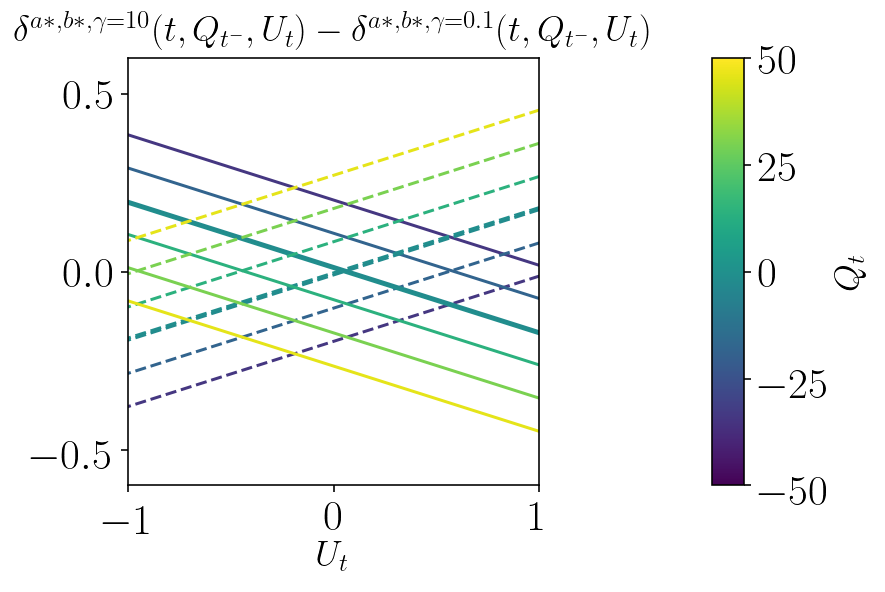

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), sharey=True, constrained_layout=True)
cmap = plt.get_cmap("viridis")
norm = Normalize(vmin=min(mm.q_vector), vmax=max(mm.q_vector))
sm = ScalarMappable(norm=norm, cmap=cmap)

delta_a_m0, delta_b_m0, _, _ = mm_gamma[f'gamma0'].get_deltas_FI()
delta_a_m2, delta_b_m2, _, _ = mm_gamma[f'gamma2'].get_deltas_FI()

for q in range(1,len(mm.q_vector)-1):
    if q%int(mm.q_bar/3) ==0 or q == mm.q_bar-1:
        color = cmap(norm(mm.q_vector[q]))
        ax.plot(mm.u_vector, delta_a_m2[int(mm.N_t / 2), :, q] - delta_a_m0[int(mm.N_t / 2), :, q], '-', color=color)
        ax.plot(mm.u_vector, delta_b_m2[int(mm.N_t / 2), :, q] - delta_b_m0[int(mm.N_t / 2), :, q], '--', color=color)
        
    # Personnalisation des axes
ax.set_xlabel(r'${U}_t$', fontsize=fsL)
#ax.set_ylim(-0.006, 0.006)
ax.set_ylim(-0.6, 0.6)
ax.set_xlim(-1,1)
ax.set_title(r'$\delta^{a*,b*, \gamma = 10}(t,Q_{t^-},{U}_t) - \delta^{a*,b*, \gamma = 0.1}(t,Q_{t^-},{U}_t)$', fontsize=fsL)
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.05, pad=0.08)
cbar.set_label(r'$Q_t$', fontsize=fsL)
plt.savefig('figures/deltas_gamma.pdf', format="pdf", dpi=dpi)
plt.show()

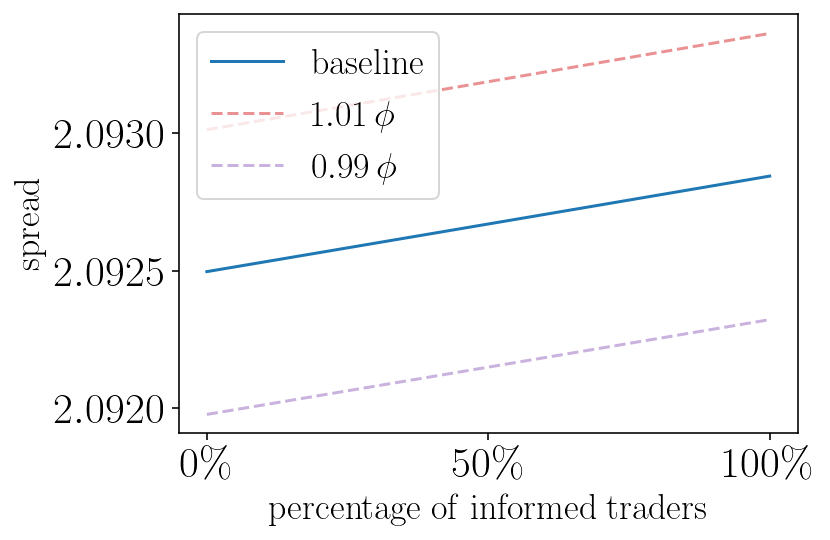

In [16]:
def spread(psi, varphi, phi = params_env['phi'], k = params_env['k'], t=0., T = params_env['T'], alpha = params_env['alpha']):
    kappa = 4.*(varphi + psi)*np.exp(-1)*k
    beta =  (np.sqrt(phi) + np.sqrt(kappa)*alpha )/ (np.sqrt(phi) - np.sqrt(kappa)*alpha)
    return 2./k - 2*(np.sqrt(phi)/np.sqrt(kappa))*(1. - np.exp(2*np.sqrt(phi*kappa)*(T-t))*beta)/(1. + np.exp(2*np.sqrt(phi*kappa)*(T-t))*beta)    



fs = 18
uninformed =  np.linspace(30., 1e-5, num = 15)
informed = np.zeros_like(uninformed)
percentage_inf_uninf = np.zeros_like(uninformed)
for iu, uninf in enumerate(uninformed):
    params_aux = params_env.copy()
    params_aux['varphi'] = uninf
    params_aux['matrixCJ'] = []
    mm_aux = utils.mm_with_fads(**params_aux)
    informed[iu] = mm_aux.psi
    percentage_inf_uninf[iu] = (mm_aux.total_arrivals - uninf)/ mm_aux.total_arrivals


fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# baseline
phi =params_env['phi']  #0.1 #params_env['phi']
alpha = params_env['alpha'] #0.001 #params_env['alpha']
shift = 0.01

ax.plot(percentage_inf_uninf, spread(informed, uninformed, alpha = alpha, phi = phi), '-', label = r'$\mathrm{baseline}$',  color = 'tab:blue')
# phi stressing
ax.plot(percentage_inf_uninf, spread(informed, uninformed, phi = (1+shift)*phi, alpha = alpha), '--',  color = 'tab:red', alpha = 0.5, label = fr'${shift+1}\,\phi$')
ax.plot(percentage_inf_uninf, spread(informed, uninformed, phi = (1-shift)*phi, alpha = alpha), '--',  color = 'tab:purple', alpha = 0.5, label = fr'${1- shift}\,\phi$')
# alpha stressing
#ax.plot(percentage_inf_uninf, spread(informed, uninformed, phi = phi, alpha = (1+shift)*alpha), '--',  color = 'tab:red', alpha = 0.5, label = fr'${shift+1}\,\alpha$')
#ax.plot(percentage_inf_uninf, spread(informed, uninformed, phi = phi, alpha = (1-shift)*alpha), '--',  color = 'tab:orange',alpha = 0.5, label = fr'${-shift+1}\,\alpha$')

#ax.set_yticks([2.009, 2.01])
ax.set_xticks([0,0.5,1])
ax.set_xticklabels([r'$0\%$', r'$50\%$', r'$100\%$'])
plt.legend(fontsize = fs)
ax.set_xlabel(r'$\mathrm{percentage\; of\; informed\; traders}$', fontsize=fsL)
ax.set_ylabel(r'$\mathrm{spread}$', fontsize=fsL)
plt.tight_layout()
plt.savefig('figures/spread-percentage-informed.pdf', format="pdf", dpi=dpi)
plt.show() #we plot delta^a / H / detla^b as functions of U,Q at t = 0.5

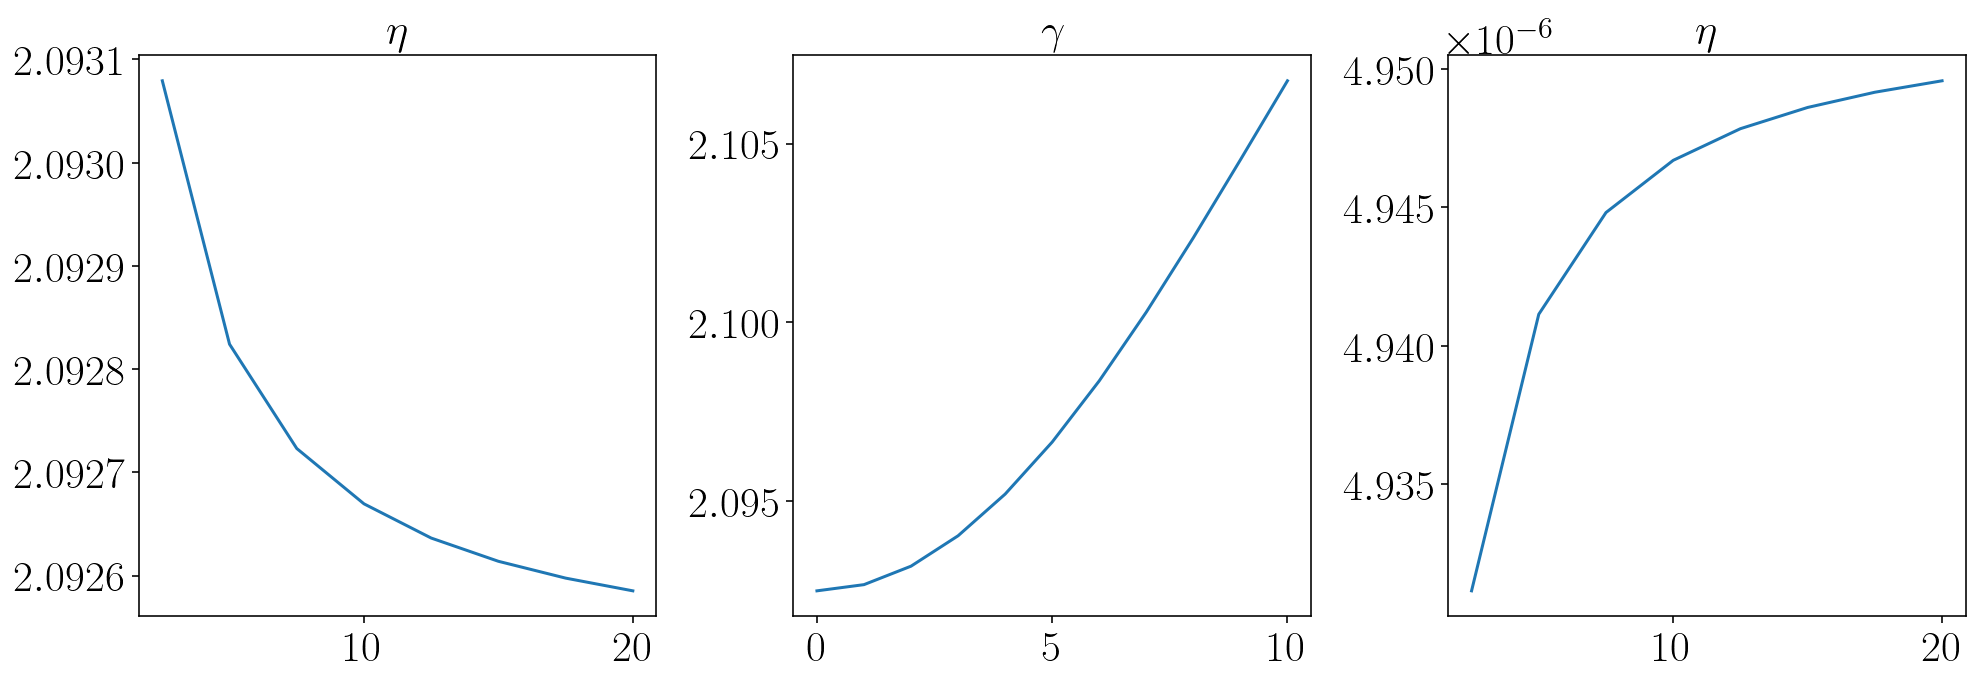

In [17]:
def spread(psi, varphi, phi = params_env['phi'], k = params_env['k'], t=0., T = params_env['T'], alpha = params_env['alpha']):
    kappa = 4.*(varphi + psi)*np.exp(-1)*k
    beta =  (np.sqrt(phi) + np.sqrt(kappa)*alpha )/ (np.sqrt(phi) - np.sqrt(kappa)*alpha)
    return 2./k - 2*(np.sqrt(phi)/np.sqrt(kappa))*(1. - np.exp(2*np.sqrt(phi*kappa)*(T-t))*beta)/(1. + np.exp(2*np.sqrt(phi*kappa)*(T-t))*beta)    


G= []
S = []
Z = []
fs = 18
eta = np.linspace(2.5,20, num = 8)
gamma = np.linspace(0,10,11)
qconst = np.linspace(0,1,5)
for g in eta:
    params_aux = params_env.copy()
    params_aux['eta'] = g
    params_aux['matrixCJ'] = []
    mm_aux = utils.mm_with_fads(**params_aux)
    S.append(spread(mm_aux.psi, mm_aux.varphi))
    Z.append(mm_aux.get_delta_fast(0,0,0)[0] + mm_aux.get_delta_fast(0,0,0)[1] - spread(mm_aux.psi, mm_aux.varphi))
for g in gamma:
    params_aux = params_env.copy()
    params_aux['gamma'] = g
    params_aux['matrixCJ'] = []
    mm_aux = utils.mm_with_fads(**params_aux)
    G.append(spread(mm_aux.psi, mm_aux.varphi))


Zz = np.array(Z)
Ss = np.array(S)
Gg = np.array(G)
fig, ax = plt.subplots(1, 3, figsize=(14, 5))
ax[0].plot(eta,Ss)
ax[0].set_title(r'$\eta$')
ax[2].plot(eta,Zz)
ax[2].set_title(r'$\eta$')
ax[1].plot(gamma,Gg)
ax[1].set_title(r'$\gamma$')
plt.tight_layout()
plt.savefig('spread_eta.pdf', dpi = 300, format = 'pdf')
plt.show()

# Simulation of $U$ and $\hat{U}$

In [18]:
mm_qconst = {'q0': mm, 'q1': mm, 'q2':mm}

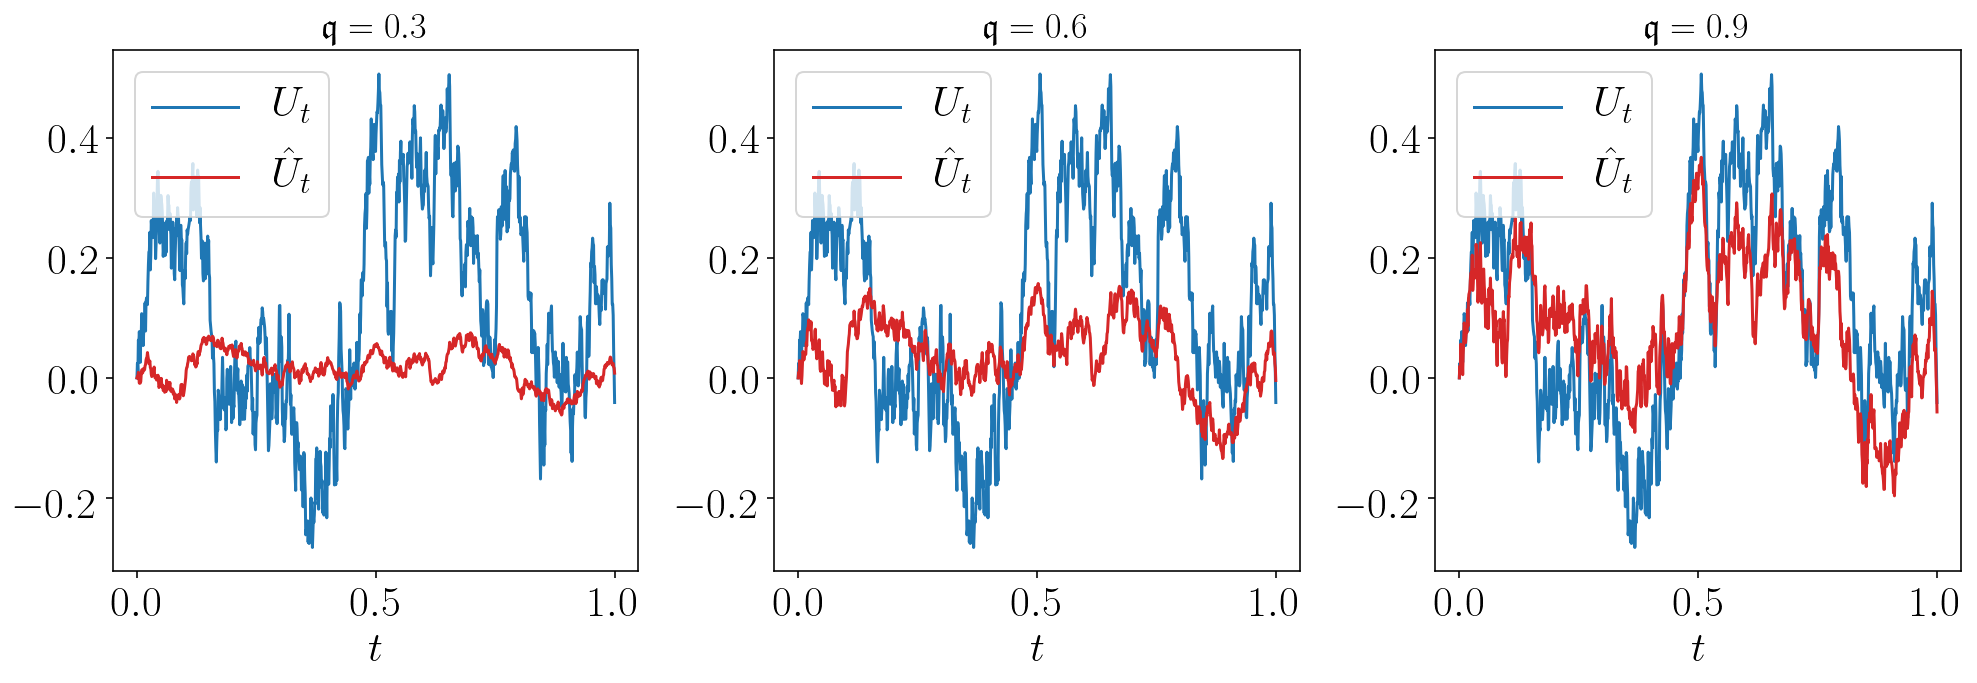

In [20]:
seed = 36457656
q_const_values = np.array([0.3,0.6,.9])
Naux = len(q_const_values)
fig, ax = plt.subplots(1, 3, figsize=(14, 5), sharey=False, sharex=True)

for iq, qconst_value in enumerate(q_const_values):
    params_aux = params_env.copy()
    params_aux['qconst'] = qconst_value
    mm_aux = utils.mm_with_fads(**params_aux)
    mm_qconst[f'q{iq}'] = mm_aux
    np.random.seed(seed)
    U,U_hat, _,_,_,_ = mm_qconst[f'q{iq}'].plotting()
    ax[iq].plot(mm.t_vector,  U, color ='tab:blue', label=r'$U_t$')
    ax[iq].plot(mm.t_vector,  U_hat, color ='tab:red', label=r'$\hat{U}_t$')
    ax[iq].set_xlabel(r'$t$', fontsize=fsL+3)
    ax[iq].legend()
    ax[iq].set_title(fr'$\mathfrak q = {qconst_value}$', fontsize=fsL)
    
plt.tight_layout()
plt.savefig('figures/u__u_hat.pdf', dpi = 300, format = 'pdf')
plt.show()

# Simulation of $S_t$ and $F_t$

In [22]:
mm_qconst = {'q0': mm, 'q1': mm, 'q2':mm}

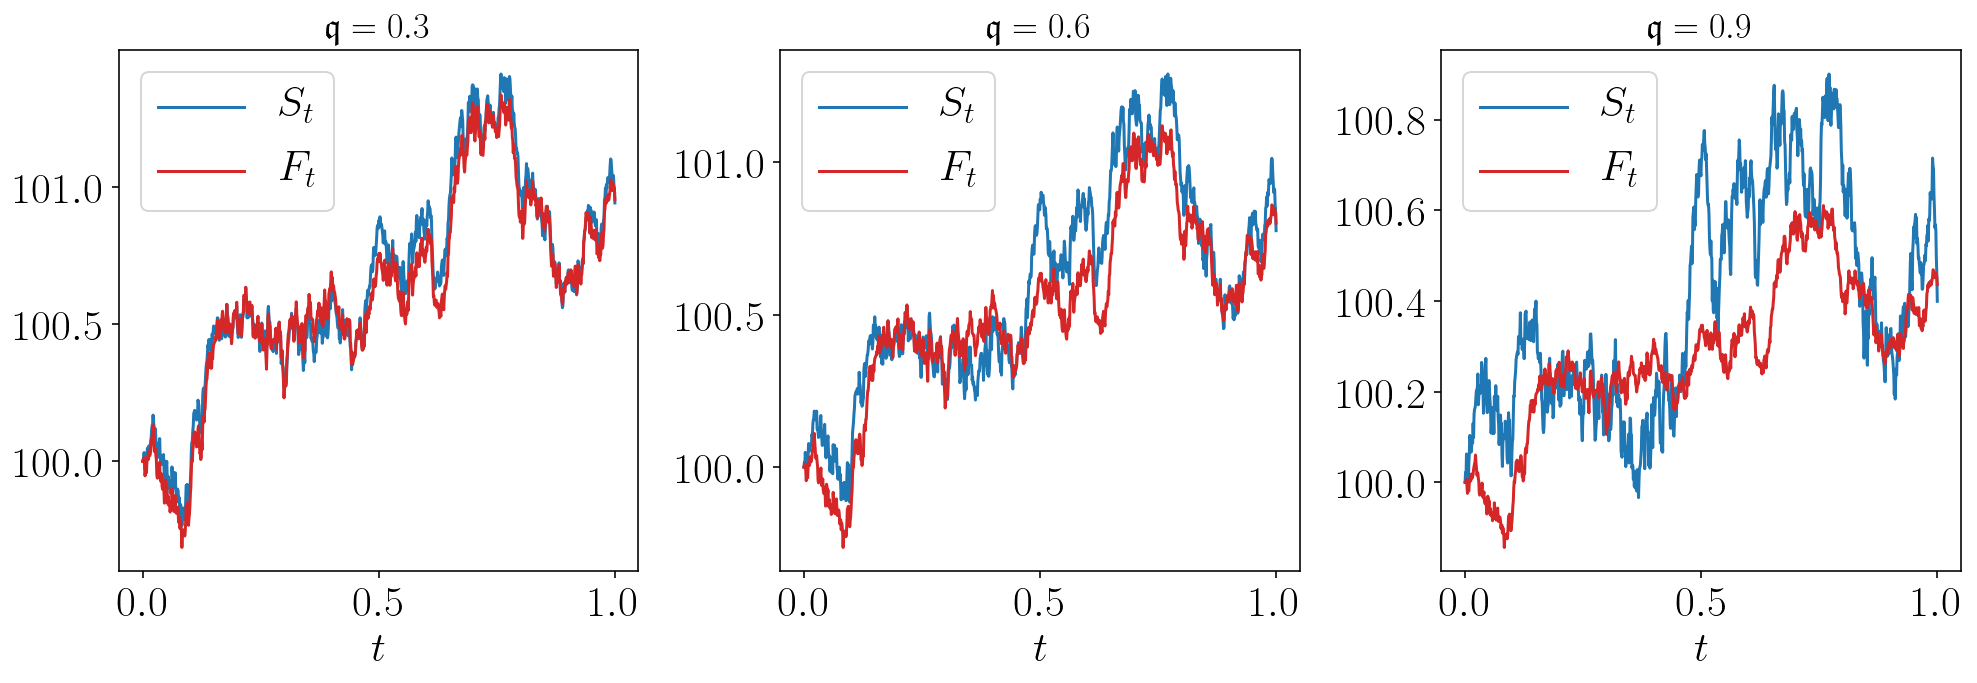

In [23]:
seed = 36457656
q_const_values = np.array([0.3,0.6,0.9])
Naux = len(q_const_values)
fig, ax = plt.subplots(1, 3, figsize=(14, 5), sharey=False, sharex=True)

for iq, qconst_value in enumerate(q_const_values):
    params_aux = params_env.copy()
    params_aux['qconst'] = qconst_value
    mm_aux = utils.mm_with_fads(**params_aux)
    mm_qconst[f'q{iq}'] = mm_aux
    np.random.seed(seed)
    _,_,S,_,_,F = mm_qconst[f'q{iq}'].plotting()
    ax[iq].plot(mm.t_vector,  S, color ='tab:blue', label=r'$S_t$')
    ax[iq].plot(mm.t_vector,  F, color ='tab:red', label=r'$F_t$')
    ax[iq].set_xlabel(r'$t$', fontsize=fsL+3)
    ax[iq].legend()
    ax[iq].set_title(fr'$\mathfrak q = {qconst_value}$', fontsize=fsL)
    
plt.tight_layout()
plt.savefig('figures/s_s_wt.pdf', dpi = 300, format = 'pdf')
plt.show()

# PnL as a function of $\mathfrak{q}$

In [24]:
def mean_sd(x):
    return np.mean(x),np.sqrt(np.var(x))

In [25]:
mm_qconst = {'q0': mm, 'q1': mm, 'q2':mm,'q3':mm,'q4':mm,'q5':mm}
PnL_table_FI = []
PnL_table_PI = []
PnL_table_CJ = []

PnL_table_FI_q = []
PnL_table_PI_q = []
PnL_table_CJ_q = []

#for the baseline parameters : 
#FI = [211.97, 213.56, 214.53, 214.66, 214.24, 214.04, 214.09, 214.23, 214.60, 215.41, 216.87]
#CJ = [211.97, 213.07, 212.81, 211.17, 208.52, 205.00, 200.64, 195.27, 188.84, 181.41, 172.93]
#PI = [211.97, 213.07, 212.82, 211.26, 208.86, 205.82, 202.37, 198.89, 196.46, 197.54, 216.87]

In [26]:
seed = 36457656
q_const_values = np.linspace(0,1,6)
params_env_cop = params_env.copy()
params_env_cop['matrixCJ'] = np.array(mm.get_delta_CJ_matrix())
for iq,const_value in enumerate(q_const_values):
    params_aux = params_env_cop.copy()
    params_aux['qconst'] = const_value
    mm_aux = utils.mm_with_fads(**params_aux)
    mm_qconst[f'q{iq}'] = mm_aux
    np.random.seed(seed)
    PnL_val = mm_qconst[f'q{iq}'].PnL(100_000)
    #to plot
    PnL_table_FI.append(mean_sd(PnL_val[0])[0])
    PnL_table_CJ.append(mean_sd(PnL_val[1])[0])
    PnL_table_PI.append(mean_sd(PnL_val[2])[0])
    
    #to put on the table (with standard deviation)
    PnL_table_FI_q.append(mean_sd(PnL_val[0]))
    PnL_table_CJ_q.append(mean_sd(PnL_val[1]))
    PnL_table_PI_q.append(mean_sd(PnL_val[2]))

999it [01:13, 13.52it/s]
999it [01:23, 11.94it/s]
999it [01:11, 13.97it/s]
999it [01:18, 12.80it/s]
999it [01:27, 11.43it/s]
999it [01:08, 14.59it/s]


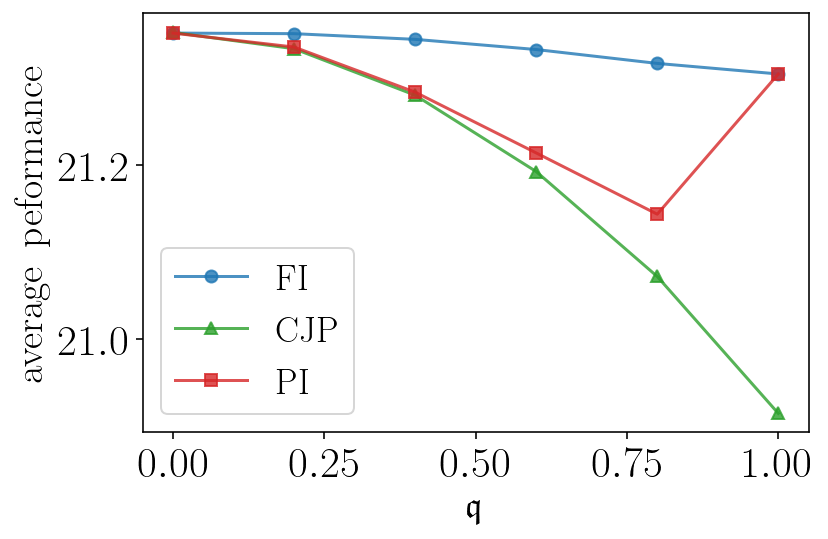

In [28]:
plt.figure(figsize=(6, 4))
plt.plot(q_const_values, PnL_table_FI, label=r'$\mathrm{FI}$',alpha = 0.8, color='tab:blue', marker='o')
plt.plot(q_const_values, PnL_table_CJ, label=r'$\mathrm{CJP}$',alpha = 0.8, color='tab:green', marker='^')
plt.plot(q_const_values, PnL_table_PI, label=r'$\mathrm{PI}$',alpha = 0.8, color='tab:red', marker='s')

# Ajout des titres et légendes
plt.xlabel('$\mathfrak{q}$', fontsize=fsL)
plt.ylabel('$\mathrm{average\;\,peformance}$', fontsize=fsL+2)
plt.legend(fontsize=fs)
plt.tight_layout()
plt.savefig('figures/PnL_qconst.pdf', dpi = dpi, format = 'pdf')
plt.show()

In [26]:
print(PnL_table_FI_q)
print(PnL_table_CJ_q)
print(PnL_table_PI_q)

[(21.34269128082771, 5.100084776665097), (21.341127047392643, 5.082960019198304), (21.338042467140298, 5.032344694608387), (21.328935653379787, 4.944184402885708), (21.312302932296685, 4.815738764890367), (21.30339812296522, 4.644876293014301)]
[(21.34229278810565, 5.098855495716015), (21.322672114440415, 5.08319684954361), (21.272783795150005, 5.030586246924046), (21.184615906000584, 4.9420179515849645), (21.063643717320655, 4.820230392058767), (20.912318121928344, 4.650264517013416)]
[(21.34269128082771, 5.100084776665097), (21.324747136031736, 5.085223331933375), (21.276399817595593, 5.032385763815667), (21.204488029376314, 4.945549943121094), (21.142335073563885, 4.819417726547946), (21.30339812296522, 4.644876293014303)]


# PnL as a function of $\gamma$

In [10]:
mm_gamma = {'q0': mm, 'q1': mm, 'q2':mm,'q3':mm}
PnL_table_FI = []
PnL_table_PI = []
PnL_table_CJ = []

PnL_table_FI_g = []
PnL_table_PI_g = []
PnL_table_CJ_g = []

# money of informed traders, computation of their PnL when $\psi$ is rescaled

In [11]:
PnL_IT = []
seed = 36457656
gamma_values = np.linspace(0,3,4)
params_env_cop = params_env.copy()
params_env_cop['matrixCJ'] = np.array(mm.get_delta_CJ_matrix())
for iq,gamma_value in enumerate(gamma_values):
    params_aux = params_env_cop.copy()
    params_aux['gamma'] = gamma_value
    mm_aux = utils.mm_with_fads(**params_aux)
    mm_gamma[f'q{iq}'] = mm_aux
    np.random.seed(seed)
    PnL_val = mm_gamma[f'q{iq}'].PnL(100_000)
    PnL_IT.append((np.mean(PnL_val[3]), np.mean(PnL_val[4])))
print(PnL_IT)

999it [01:06, 15.01it/s]
999it [01:09, 14.43it/s]
999it [01:09, 14.45it/s]
999it [01:08, 14.55it/s]

[(-11.39153943819433, -11.419162997993352), (-11.230431866032891, -11.41915180551503), (-11.077890245926886, -11.42412207296423), (-10.932840568385851, -11.4293520899268)]


# Only informed traders, computation of their PnL when $\psi$ is not rescaled

In [12]:
mm_gamma = {'q0': mm, 'q1': mm, 'q2':mm,'q3':mm}
PnL_table_FI = []
PnL_table_PI = []
PnL_table_CJ = []

PnL_table_FI_g = []
PnL_table_PI_g = []
PnL_table_CJ_g = []

In [13]:
PnL_IT_un = []
seed = 36457656
gamma_values = np.linspace(0,3,4)
params_env_cop = params_env.copy()
params_env_cop['matrixCJ'] = np.array(mm.get_delta_CJ_matrix())
for iq,gamma_value in enumerate(gamma_values):
    params_aux = params_env_cop.copy()
    params_aux['gamma'] = gamma_value
    mm_aux = utils.mm_with_fads(**params_aux)
    mm_aux.psi = 14.87
    mm_gamma[f'q{iq}'] = mm_aux
    np.random.seed(seed)
    PnL_val = mm_gamma[f'q{iq}'].PnL(100_000)
    PnL_IT_un.append((np.mean(PnL_val[3]), np.mean(PnL_val[4])))
print(PnL_IT_un)

999it [01:07, 14.72it/s]
999it [01:18, 12.71it/s]
999it [01:06, 15.05it/s]
999it [01:05, 15.21it/s]

[(-11.2943303233706, -11.416406541462282), (-11.228390340386646, -11.419235853360734), (-11.359796570149134, -11.426398766157057), (-11.70545822011867, -11.428729644432453)]


In [14]:
print(PnL_IT)
print(PnL_IT_un)

[(-11.39153943819433, -11.419162997993352), (-11.230431866032891, -11.41915180551503), (-11.077890245926886, -11.42412207296423), (-10.932840568385851, -11.4293520899268)]
[(-11.2943303233706, -11.416406541462282), (-11.228390340386646, -11.419235853360734), (-11.359796570149134, -11.426398766157057), (-11.70545822011867, -11.428729644432453)]


## Conclusion : informed traders lose more money when we do not rescale $\gamma$

# Go back to computations

In [ ]:
mm_gamma = {'q0': mm, 'q1': mm, 'q2':mm,'q3':mm}
PnL_table_FI = []
PnL_table_PI = []
PnL_table_CJ = []

PnL_table_FI_g = []
PnL_table_PI_g = []
PnL_table_CJ_g = []

In [28]:
seed = 36457656
gamma_values = np.linspace(0,3,4)
params_env_cop = params_env.copy()
params_env_cop['matrixCJ'] = np.array(mm_aux.get_delta_CJ_matrix())
for iq,gamma_value in enumerate(gamma_values):
    params_aux = params_env_cop.copy()
    params_aux['gamma'] = gamma_value
    mm_aux = utils.mm_with_fads(**params_aux)
    mm_gamma[f'q{iq}'] = mm_aux
    np.random.seed(seed)
    PnL_val = mm_gamma[f'q{iq}'].PnL(100_000)
    #to plot
    PnL_table_FI.append(mean_sd(PnL_val[0])[0])
    PnL_table_CJ.append(mean_sd(PnL_val[1])[0])
    PnL_table_PI.append(mean_sd(PnL_val[2])[0])
    
    #to put on the table 
    
    PnL_table_FI_g.append(mean_sd(PnL_val[0]))
    PnL_table_CJ_g.append(mean_sd(PnL_val[1]))
    PnL_table_PI_g.append(mean_sd(PnL_val[2]))

999it [00:14, 67.68it/s]
999it [00:15, 66.51it/s]
999it [00:15, 66.20it/s]
999it [00:15, 65.12it/s]


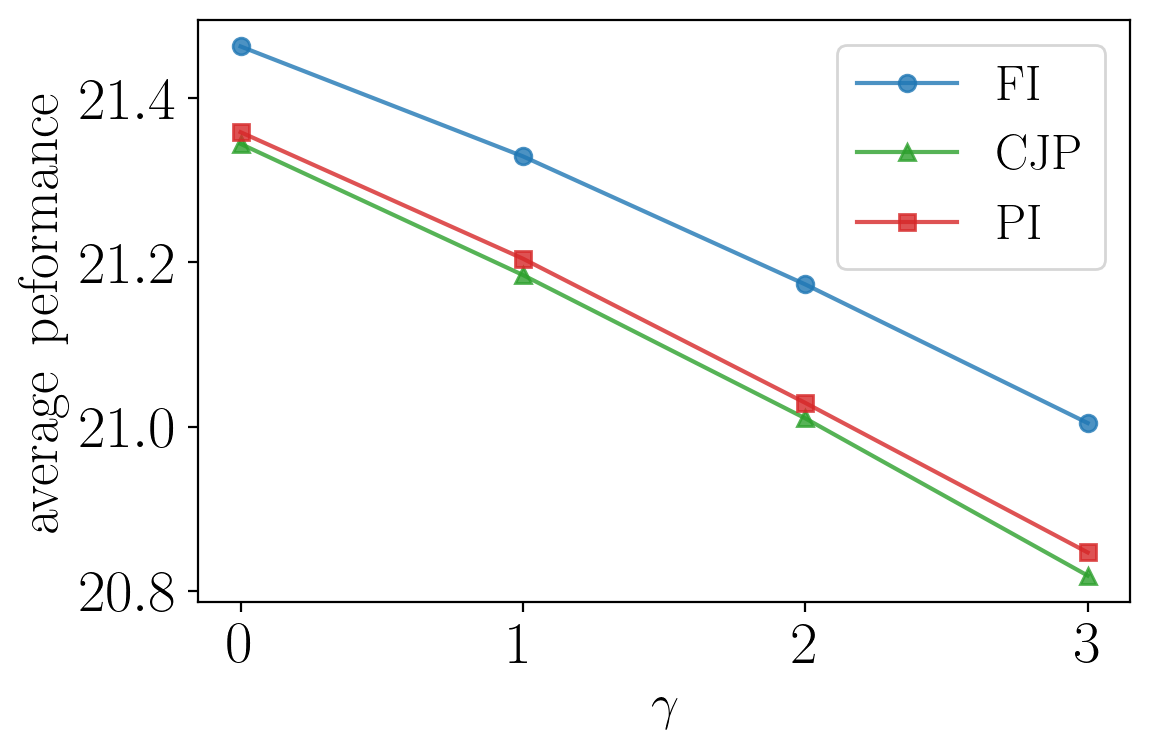

In [29]:
plt.figure(figsize=(6, 4))
plt.plot(gamma_values, PnL_table_FI, label=r'$\mathrm{FI}$',alpha = 0.8, color='tab:blue', marker='o')
plt.plot(gamma_values, PnL_table_CJ, label=r'$\mathrm{CJP}$',alpha = 0.8, color='tab:green', marker='^')
plt.plot(gamma_values, PnL_table_PI, label=r'$\mathrm{PI}$',alpha = 0.8, color='tab:red', marker='s')

# Ajout des titres et légendes
plt.xlabel('$\gamma$', fontsize=fsL)
plt.ylabel('$\mathrm{average\;\,peformance}$', fontsize=fsL+2)
plt.legend(fontsize=fs)
plt.tight_layout()
plt.savefig('figures/PnL_gamma.pdf', dpi = 300, format = 'pdf')
plt.show()

In [30]:
print(PnL_table_FI_g)
print( PnL_table_CJ_g)
print( PnL_table_PI_g)

[(21.46259776423458, 4.972274998401327), (21.328935653379784, 4.944184402885709), (21.173204161837926, 4.920461252000645), (21.004640134596848, 4.912533911984122)]
[(21.34411470248781, 4.966318091817094), (21.184615906000584, 4.9420179515849645), (21.01032434611428, 4.9304067370360825), (20.819112828281426, 4.926365738817695)]
[(21.35833269639359, 4.965978241176221), (21.204488029376314, 4.945549943121093), (21.029130682581282, 4.9318888379556824), (20.84725504259337, 4.9288426256992155)]


# PnL as a function of $\psi$ and $\varphi$


In [75]:
mm_psi = {'p0': mm, 'p1': mm, 'p2':mm,'p3':mm,'p4':mm}
PnL_table_FI = []
PnL_table_PI = []
PnL_table_CJ = []

PnL_table_FI_p = []
PnL_table_PI_p = []
PnL_table_CJ_p = []

In [76]:
seed = 36457656
psi_pourcentage_psi_values = np.linspace(0,2,5)
pourc = np.linspace(0,1,5)
params_env_cop = params_env.copy()
params_env_cop['matrixCJ'] = np.array(mm_aux.get_delta_CJ_matrix())
for iq,psi_pourcentage_value in enumerate(psi_pourcentage_psi_values):
    params_aux = params_env_cop.copy()
    mm_aux = utils.mm_with_fads(**params_aux)
    mm_aux.varphi= mm_aux.varphi*(2-psi_pourcentage_value)
    mm_aux.psi=psi_pourcentage_value*mm_aux.psi
    mm_psi[f'p{iq}'] = mm_aux
    np.random.seed(seed)
    PnL_val = mm_psi[f'p{iq}'].PnL(100_000)
    #to plot
    PnL_table_FI.append(mean_sd(PnL_val[0])[0])
    PnL_table_CJ.append(mean_sd(PnL_val[1])[0])
    PnL_table_PI.append(mean_sd(PnL_val[2])[0])
    
    #to put on the table 
    PnL_table_FI_p.append(mean_sd(PnL_val[0]))
    PnL_table_CJ_p.append(mean_sd(PnL_val[1]))
    PnL_table_PI_p.append(mean_sd(PnL_val[2]))

999it [00:13, 71.58it/s]
999it [00:14, 69.65it/s]
999it [00:14, 70.75it/s]
999it [00:14, 70.68it/s]
999it [00:13, 71.94it/s]


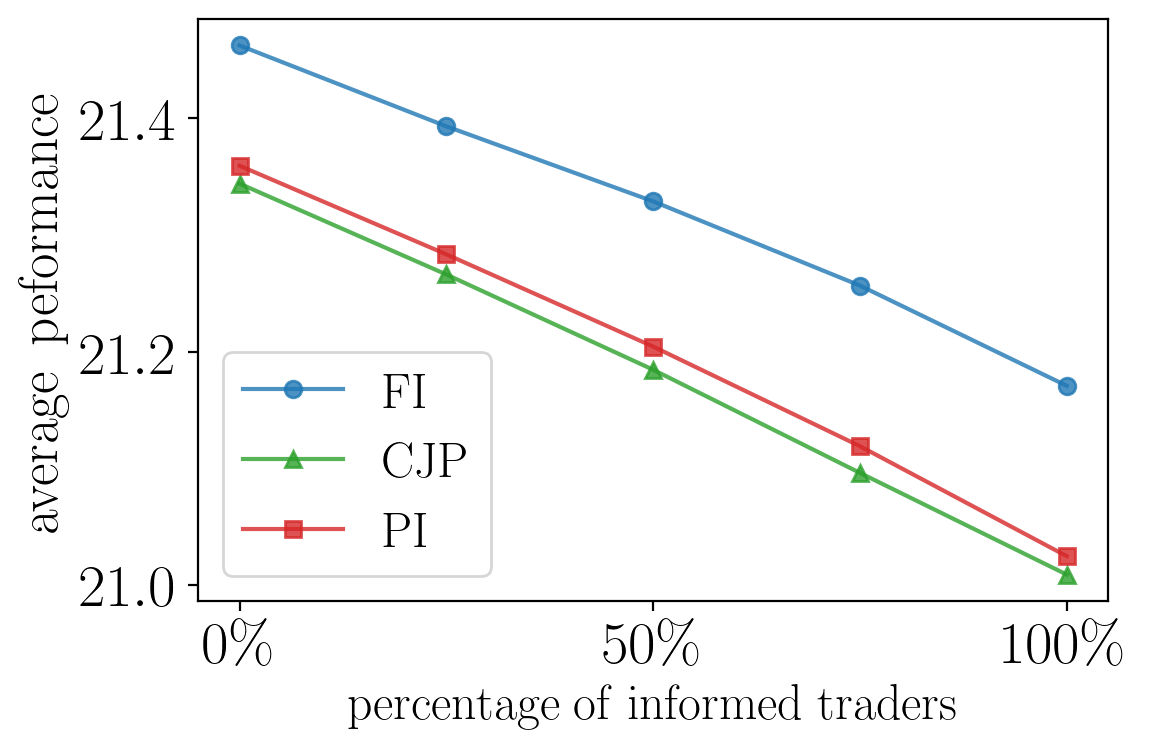

In [78]:
plt.figure(figsize=(6, 4))
plt.plot(pourc, PnL_table_FI, label=r'$\mathrm{FI}$',alpha = 0.8, color='tab:blue', marker='o')
plt.plot(pourc, PnL_table_CJ, label=r'$\mathrm{CJP}$',alpha = 0.8, color='tab:green', marker='^')
plt.plot(pourc, PnL_table_PI, label=r'$\mathrm{PI}$',alpha = 0.8, color='tab:red', marker='s')

# Ajout des titres et légendes
plt.xticks([0,0.5,1], labels= [r'$0\%$', r'$50\%$', r'$100\%$'])
plt.legend(fontsize = fs)
plt.xlabel(r'$\mathrm{percentage\; of\; informed\; traders}$', fontsize=fsL)

plt.ylabel('$\mathrm{average\;\,peformance}$', fontsize=fsL+2)
plt.legend(fontsize=fs)
plt.tight_layout()
plt.savefig('figures/PnL_psi.pdf', dpi = dpi, format = 'pdf')
plt.show()

In [34]:
print(PnL_table_FI_p)
print(PnL_table_CJ_p)
print(PnL_table_PI_p)

[(21.462543921654884, 4.970639852908396), (21.393243511534706, 4.957176420857169), (21.328935653379784, 4.944184402885709), (21.25675538106478, 4.929053707604618), (21.17087805478069, 4.920177575596138)]
[(21.34411470248781, 4.966318091817094), (21.26625314812134, 4.954771372266409), (21.184615906000584, 4.9420179515849645), (21.096225439439564, 4.93870039550499), (21.009090703375207, 4.931498597985995)]
[(21.359448426033534, 4.966116820928099), (21.283533654674166, 4.955779901623507), (21.204488029376314, 4.945549943121093), (21.119120262254256, 4.939675929144495), (21.024886556236336, 4.933747490611712)]


# PnL as a function of $\eta$


In [35]:
mm_eta = {'e0': mm, 'e1': mm, 'e2':mm,'e3':mm, 'e3':mm}
PnL_table_FI = []
PnL_table_PI = []
PnL_table_CJ = []

PnL_table_FI_e = []
PnL_table_PI_e = []
PnL_table_CJ_e = []

In [36]:
seed = 36457656
eta_values = np.linspace(2.5,12.5,5)
params_env_cop = params_env.copy()
params_env_cop['matrixCJ'] = np.array(mm_aux.get_delta_CJ_matrix())
for iq,eta_value in enumerate(eta_values):
    params_aux = params_env_cop.copy()
    params_aux['eta'] = eta_value
    mm_aux = utils.mm_with_fads(**params_aux)
    mm_eta[f'e{iq}'] = mm_aux
    np.random.seed(seed)
    PnL_val = mm_eta[f'e{iq}'].PnL(100_000)
    #to plot
    PnL_table_FI.append(mean_sd(PnL_val[0])[0])
    PnL_table_CJ.append(mean_sd(PnL_val[1])[0])
    PnL_table_PI.append(mean_sd(PnL_val[2])[0])
    
    #to put on the table 
    
    PnL_table_FI_e.append(mean_sd(PnL_val[0]))
    PnL_table_CJ_e.append(mean_sd(PnL_val[1]))
    PnL_table_PI_e.append(mean_sd(PnL_val[2]))

999it [00:15, 66.04it/s]
999it [00:14, 69.96it/s]
999it [00:14, 69.77it/s]
999it [00:15, 66.01it/s]
999it [00:14, 68.37it/s]


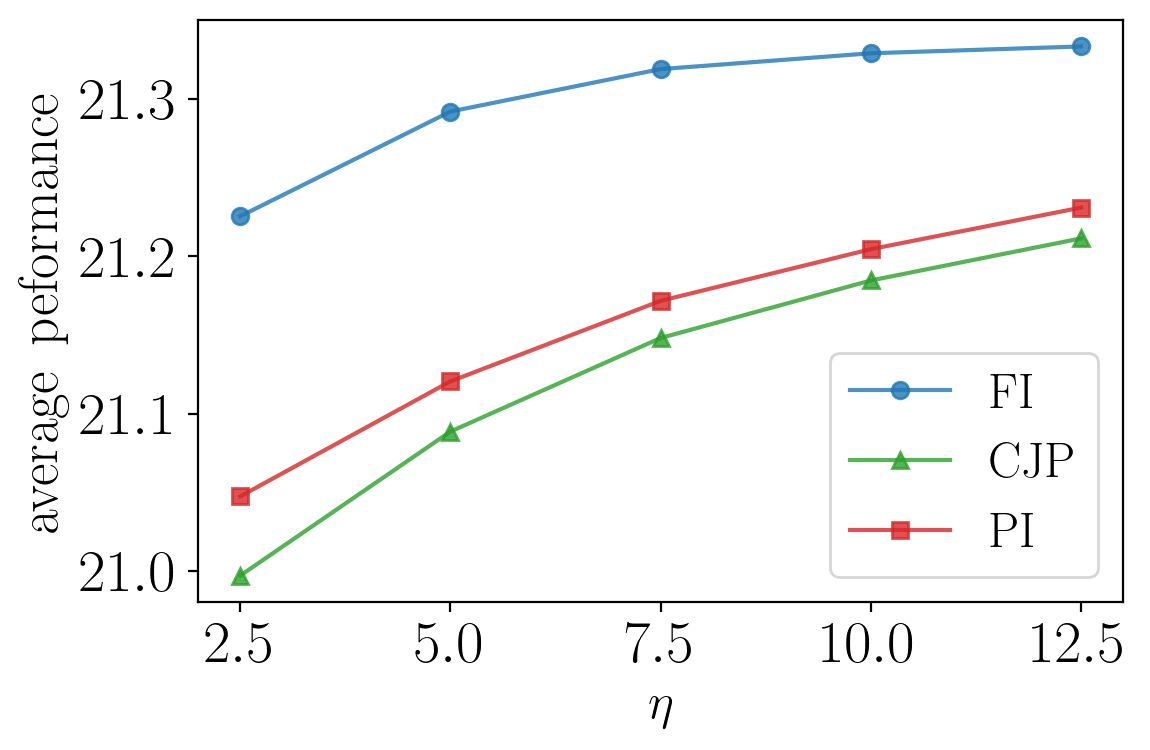

In [37]:
plt.figure(figsize=(6, 4))
plt.plot(eta_values, PnL_table_FI, label=r'$\mathrm{FI}$',alpha = 0.8, color='tab:blue', marker='o')
plt.plot(eta_values, PnL_table_CJ, label=r'$\mathrm{CJP}$',alpha = 0.8, color='tab:green', marker='^')
plt.plot(eta_values, PnL_table_PI, label=r'$\mathrm{PI}$',alpha = 0.8, color='tab:red', marker='s')

# Ajout des titres et légendes
plt.xlabel('$\eta$', fontsize=fsL)
plt.ylabel('$\mathrm{average\;\,peformance}$', fontsize=fsL+2)
plt.legend(fontsize=fs)
plt.tight_layout()
plt.savefig('figures/PnL_eta.pdf', dpi = 300, format = 'pdf')
plt.show()

In [38]:
print(PnL_table_FI_e)
print(PnL_table_CJ_e)
print(PnL_table_PI_e)

[(21.225427458567854, 4.969082111215319), (21.291937580906126, 4.955234894687073), (21.318898838727296, 4.9485093324479035), (21.328935653379784, 4.944184402885709), (21.333276583988024, 4.940933810808013)]
[(20.997172323572034, 5.003255945011298), (21.088660573367765, 4.96605429256372), (21.148071900358875, 4.950982194333173), (21.184615906000584, 4.9420179515849645), (21.211347355737182, 4.939862899243814)]
[(21.04750157057536, 5.00584160816644), (21.120537879005646, 4.968675217400381), (21.171687203672608, 4.955943085402019), (21.204488029376314, 4.945549943121093), (21.230917997029046, 4.94063938109954)]


# Plot of $Q_t$ and $U_t$ for two values of $\gamma$

In [29]:
mm_gamma = {'g0':mm,'g1':mm}
U = {'g0':[], 'g1':[]} 
Q = {'g0':[], 'g1':[]} 

In [30]:
seed = 36457656
gamma_values = np.array([0.1,10.])
params_env_cop = params_env.copy()
params_env_cop['varphi'] = 0
params_env_cop['matrixCJ'] = np.array(mm.get_delta_CJ_matrix())
for iq,gamma_value in enumerate(gamma_values):
    params_aux = params_env_cop.copy()
    params_aux['gamma'] = gamma_value
    mm_aux = utils.mm_with_fads(**params_aux)
    mm_gamma[f'g{iq}'] = mm_aux
    np.random.seed(seed)
    PnL_val = mm_gamma[f'g{iq}'].PnL(sim = 1, verbose = True)
    U[f'g{iq}'],Q[f'g{iq}'] = PnL_val[3],PnL_val[4]

999it [00:00, 1254.56it/s]
999it [00:00, 1259.03it/s]


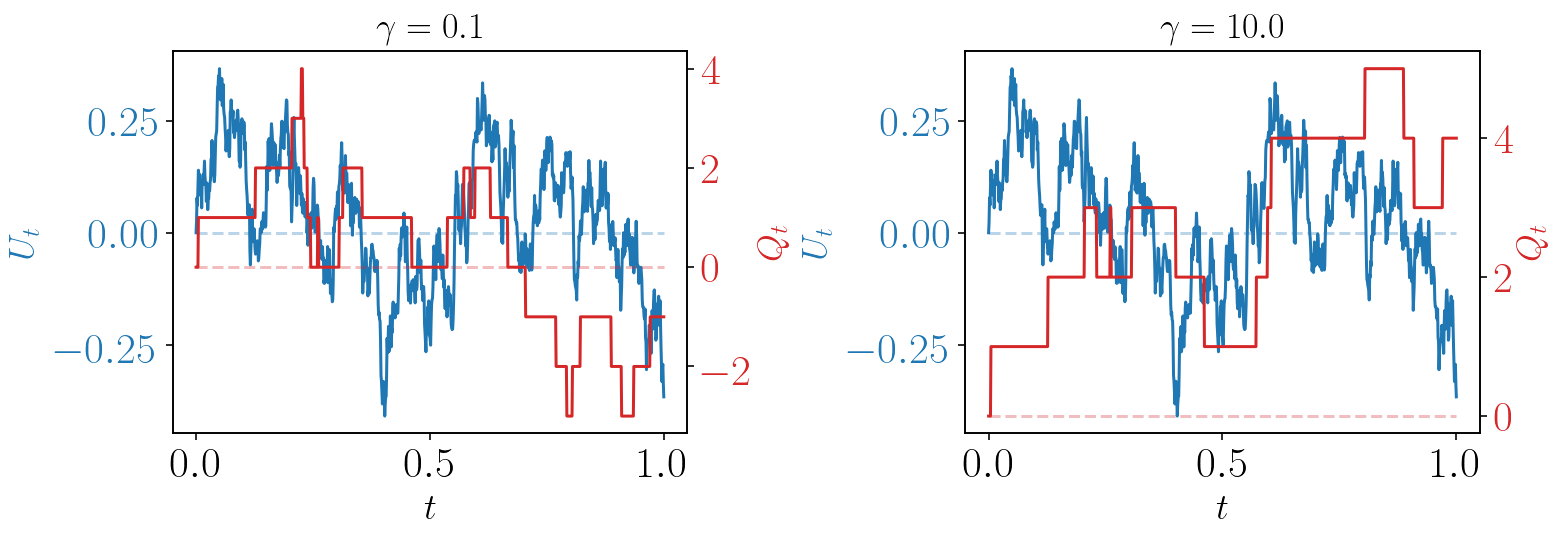

In [31]:
t = mm.t_vector
fig, axes = plt.subplots(1, 2, figsize=(11, 4)) 

ax1 = axes[0]
ax1.plot(t, U['g0'][:,0], color='tab:blue', label=r'$U_t$')  
ax1.set_xlabel(r'$t$', fontsize=fsL)
ax1.set_ylabel(r'$U_t$', fontsize=fsL, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title(rf'$\gamma = {gamma_values[0]}$', fontsize=fsL)
ax1.hlines(y = 0, xmin = mm.t_vector[0], xmax = mm.t_vector[-1], linestyle = '--', color = 'tab:blue', alpha = 0.3)

ax1b = ax1.twinx()
ax1b.plot(t, Q['g0'][:,0], color='tab:red', label=r'$Q_t$')  
ax1b.set_ylabel(r'$Q_t$', fontsize=fsL, color='tab:red')
ax1b.tick_params(axis='y', labelcolor='tab:red')
ax1b.hlines(y = 0, xmin = mm.t_vector[0], xmax = mm.t_vector[-1], linestyle = '--', color = 'tab:red', alpha = 0.3)

ax2 = axes[1]
ax2.plot(t, U['g1'][:,0], color='tab:blue', label=r'$U_t$')  
ax2.set_xlabel(r'$t$', fontsize=fsL)
ax2.set_ylabel(r'$U_t$', fontsize=fsL, color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_title(rf'$\gamma = {gamma_values[1]}$', fontsize=fsL)
ax2.hlines(y = 0, xmin = mm.t_vector[0], xmax = mm.t_vector[-1], linestyle = '--', color = 'tab:blue', alpha = 0.3)

ax2b = ax2.twinx()
ax2b.plot(t, Q['g1'][:,0], color='tab:red', label=r'$Q_t$')  
ax2b.set_ylabel(r'$Q_t$', fontsize=fsL, color='tab:red')
ax2b.tick_params(axis='y', labelcolor='tab:red')
ax2b.hlines(y = 0, xmin = mm.t_vector[0], xmax = mm.t_vector[-1], linestyle = '--', color = 'tab:red', alpha = 0.3)

plt.tight_layout()
plt.savefig('figures/Q_tandU_t.pdf', dpi = dpi, format = 'pdf')
plt.show()

# Correlation

In [42]:
seed = 36457656
gamma_values = np.array([0.1,10.])
params_env_cop = params_env.copy()
params_env_cop['varphi'] = 0
params_env_cop['matrixCJ'] = np.array(mm.get_delta_CJ_matrix())
for iq,gamma_value in enumerate(gamma_values):
    params_aux = params_env_cop.copy()
    params_aux['gamma'] = gamma_value
    mm_aux = utils.mm_with_fads(**params_aux)
    mm_gamma[f'g{iq}'] = mm_aux
    np.random.seed(seed)
    PnL_val = mm_gamma[f'g{iq}'].PnL(sim = 1_000, verbose = True)
    U[f'g{iq}'],Q[f'g{iq}'] = PnL_val[3],PnL_val[4]

999it [00:00, 3318.60it/s]
999it [00:00, 3403.76it/s]


In [43]:
aux_corr_g0 = []
aux_corr_g1 = []
for i in range(len(U['g0'][0,:])):
    aux_corr_g0.append(np.corrcoef(U['g0'][:,i],Q['g0'][:,i]))
    aux_corr_g1.append(np.corrcoef(U['g1'][:,i],Q['g1'][:,i]))

In [44]:
np.mean(aux_corr_g0)

0.49357661079529097

In [45]:
np.mean(aux_corr_g1)

0.5661223748978648

In [46]:
aux_diff_corr_g0 = []
aux_diff_corr_g1 = []
for i in range(len(U['g0'][0,:])):
    aux_diff_corr_g0.append(np.corrcoef(np.diff(U['g0'][:,i]),np.diff(Q['g0'][:,i])))
    aux_diff_corr_g1.append(np.corrcoef(np.diff(U['g1'][:,i]),np.diff(Q['g1'][:,i])))

In [47]:
np.mean(aux_diff_corr_g0)

0.4999361614916196

In [48]:
np.mean(aux_diff_corr_g1)

0.5061796848087603

# Comparison table 


In [49]:
PnL_FI = {'qconst':PnL_table_FI_q , 'gamma':PnL_table_FI_g, 'eta':PnL_table_FI_e,'psi':PnL_table_FI_p}
PnL_PI = {'qconst':PnL_table_PI_q, 'gamma':PnL_table_PI_g, 'eta':PnL_table_PI_e,'psi':PnL_table_PI_p}
PnL_CJ = {'qconst':PnL_table_CJ_q, 'gamma':PnL_table_CJ_g, 'eta':PnL_table_CJ_e,'psi':PnL_table_CJ_p}

In [50]:
PnL_FI

{'qconst': [(21.34269128082771, 5.100084776665097),
  (21.341127047392643, 5.082960019198304),
  (21.338042467140298, 5.032344694608387),
  (21.328935653379787, 4.944184402885708),
  (21.312302932296685, 4.815738764890367),
  (21.30339812296522, 4.644876293014301)],
 'gamma': [(21.46259776423458, 4.972274998401327),
  (21.328935653379784, 4.944184402885709),
  (21.173204161837926, 4.920461252000645),
  (21.004640134596848, 4.912533911984122)],
 'eta': [(21.225427458567854, 4.969082111215319),
  (21.291937580906126, 4.955234894687073),
  (21.318898838727296, 4.9485093324479035),
  (21.328935653379784, 4.944184402885709),
  (21.333276583988024, 4.940933810808013)],
 'psi': [(21.462543921654884, 4.970639852908396),
  (21.393243511534706, 4.957176420857169),
  (21.328935653379784, 4.944184402885709),
  (21.25675538106478, 4.929053707604618),
  (21.17087805478069, 4.920177575596138)]}

In [51]:
PnL_CJ

{'qconst': [(21.34229278810565, 5.098855495716015),
  (21.322672114440415, 5.08319684954361),
  (21.272783795150005, 5.030586246924046),
  (21.184615906000584, 4.9420179515849645),
  (21.063643717320655, 4.820230392058767),
  (20.912318121928344, 4.650264517013416)],
 'gamma': [(21.34411470248781, 4.966318091817094),
  (21.184615906000584, 4.9420179515849645),
  (21.01032434611428, 4.9304067370360825),
  (20.819112828281426, 4.926365738817695)],
 'eta': [(20.997172323572034, 5.003255945011298),
  (21.088660573367765, 4.96605429256372),
  (21.148071900358875, 4.950982194333173),
  (21.184615906000584, 4.9420179515849645),
  (21.211347355737182, 4.939862899243814)],
 'psi': [(21.34411470248781, 4.966318091817094),
  (21.26625314812134, 4.954771372266409),
  (21.184615906000584, 4.9420179515849645),
  (21.096225439439564, 4.93870039550499),
  (21.009090703375207, 4.931498597985995)]}

In [52]:
PnL_PI

{'qconst': [(21.34269128082771, 5.100084776665097),
  (21.324747136031736, 5.085223331933375),
  (21.276399817595593, 5.032385763815667),
  (21.204488029376314, 4.945549943121094),
  (21.142335073563885, 4.819417726547946),
  (21.30339812296522, 4.644876293014303)],
 'gamma': [(21.35833269639359, 4.965978241176221),
  (21.204488029376314, 4.945549943121093),
  (21.029130682581282, 4.9318888379556824),
  (20.84725504259337, 4.9288426256992155)],
 'eta': [(21.04750157057536, 5.00584160816644),
  (21.120537879005646, 4.968675217400381),
  (21.171687203672608, 4.955943085402019),
  (21.204488029376314, 4.945549943121093),
  (21.230917997029046, 4.94063938109954)],
 'psi': [(21.359448426033534, 4.966116820928099),
  (21.283533654674166, 4.955779901623507),
  (21.204488029376314, 4.945549943121093),
  (21.119120262254256, 4.939675929144495),
  (21.024886556236336, 4.933747490611712)]}

# PnL with terminal value at fundamental 

# PnL as a function of $\mathfrak{q}$

In [53]:
mm_qconst = {'q0': mm, 'q1': mm, 'q2':mm,'q3':mm,'q4':mm,'q5':mm}
PnL_table_FI_fd = []
PnL_table_PI_fd = []
PnL_table_CJ_fd = []

PnL_table_FI_q_fd = []
PnL_table_PI_q_fd = []
PnL_table_CJ_q_fd = []

In [54]:
seed = 36457656
q_const_values = np.linspace(0,1,6)
params_env_cop = params_env.copy()
params_env_cop['matrixCJ'] = np.array(mm.get_delta_CJ_matrix())
for iq,const_value in enumerate(q_const_values):
    params_aux = params_env_cop.copy()
    params_aux['qconst'] = const_value
    mm_aux = utils.mm_with_fads(**params_aux)
    mm_qconst[f'q{iq}'] = mm_aux
    mm_qconst[f'q{iq}'].ode_result=mm_qconst[f'q{iq}'].ODE_solver(value_at_fundamental = True)
    np.random.seed(seed)
    PnL_val = mm_qconst[f'q{iq}'].PnL(100_000, value_at_fundamental = True)
    #to plot
    PnL_table_FI_fd.append(mean_sd(PnL_val[0])[0])
    PnL_table_CJ_fd.append(mean_sd(PnL_val[1])[0])
    PnL_table_PI_fd.append(mean_sd(PnL_val[2])[0])
    
    #to put on the table (with standard deviation)
    PnL_table_FI_q_fd.append(mean_sd(PnL_val[0]))
    PnL_table_CJ_q_fd.append(mean_sd(PnL_val[1]))
    PnL_table_PI_q_fd.append(mean_sd(PnL_val[2]))

999it [00:14, 71.12it/s]
999it [00:14, 70.60it/s]
999it [00:14, 69.50it/s]
999it [00:14, 68.83it/s]
999it [00:14, 68.03it/s]
999it [00:14, 71.13it/s]


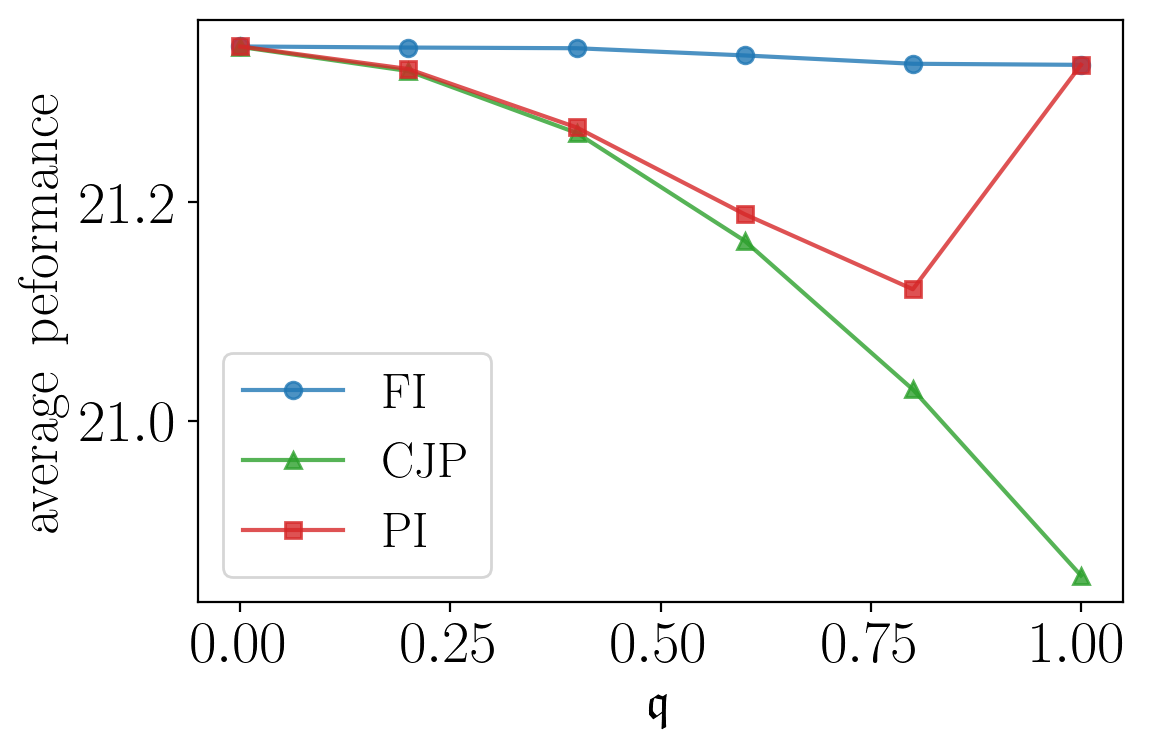

In [55]:
plt.figure(figsize=(6, 4))
plt.plot(q_const_values, PnL_table_FI_fd, label=r'$\mathrm{FI}$',alpha = 0.8, color='tab:blue', marker='o')
plt.plot(q_const_values, PnL_table_CJ_fd, label=r'$\mathrm{CJP}$',alpha = 0.8, color='tab:green', marker='^')
plt.plot(q_const_values, PnL_table_PI_fd, label=r'$\mathrm{PI}$',alpha = 0.8, color='tab:red', marker='s')

# Ajout des titres et légendes
plt.xlabel('$\mathfrak{q}$', fontsize=fsL)
plt.ylabel('$\mathrm{average\;\,peformance}$', fontsize=fsL+2)
plt.legend(fontsize=fs)
plt.tight_layout()
plt.savefig('figures/PnL_qconst_fd.pdf', dpi = dpi, format = 'pdf')
plt.show()

In [56]:
print(PnL_table_FI_q_fd)
print(PnL_table_CJ_q_fd)
print(PnL_table_PI_q_fd)

[(21.34269128082771, 5.100084776665097), (21.341691910389514, 5.082593360456416), (21.34107177025052, 5.026412647021497), (21.33447889584047, 4.930240949697745), (21.32685041330658, 4.790418181873543), (21.325860402423622, 4.600421388773463)]
[(21.34229278810565, 5.098855495716015), (21.32017834350939, 5.082118053220939), (21.263627685793598, 5.025083606660183), (21.164794843349227, 4.928973034963214), (21.028772046616332, 4.794216417621746), (20.85846132212667, 4.607469114085826)]
[(21.34269128082771, 5.100084776665097), (21.322028520049017, 5.084121741506764), (21.268583235814617, 5.025295949753533), (21.189144728763765, 4.93262321907815), (21.12048053658562, 4.794190421068252), (21.32586040242363, 4.600421388773462)]


# PnL as a function of $\gamma$

In [57]:
mm_gamma = {'q0': mm, 'q1': mm, 'q2':mm,'q3':mm}
PnL_table_FI_fd = []
PnL_table_PI_fd = []
PnL_table_CJ_fd = []

PnL_table_FI_g_fd = []
PnL_table_PI_g_fd = []
PnL_table_CJ_g_fd = []

In [58]:
seed = 36457656
gamma_values = np.linspace(0,3,4)
params_env_cop = params_env.copy()
params_env_cop['matrixCJ'] = np.array(mm_aux.get_delta_CJ_matrix())
for iq,gamma_value in enumerate(gamma_values):
    params_aux = params_env_cop.copy()
    params_aux['gamma'] = gamma_value
    mm_aux = utils.mm_with_fads(**params_aux)
    mm_gamma[f'q{iq}'] = mm_aux
    mm_gamma[f'q{iq}'].ode_result=mm_gamma[f'q{iq}'].ODE_solver(value_at_fundamental = True)
    np.random.seed(seed)
    PnL_val = mm_gamma[f'q{iq}'].PnL(100_000, value_at_fundamental= True)
    #to plot
    PnL_table_FI_fd.append(mean_sd(PnL_val[0])[0])
    PnL_table_CJ_fd.append(mean_sd(PnL_val[1])[0])
    PnL_table_PI_fd.append(mean_sd(PnL_val[2])[0])
    
    #to put on the table 
    
    PnL_table_FI_g_fd.append(mean_sd(PnL_val[0]))
    PnL_table_CJ_g_fd.append(mean_sd(PnL_val[1]))
    PnL_table_PI_g_fd.append(mean_sd(PnL_val[2]))

999it [00:14, 68.80it/s]
999it [00:14, 68.63it/s]
999it [00:14, 69.91it/s]
999it [00:14, 68.28it/s]


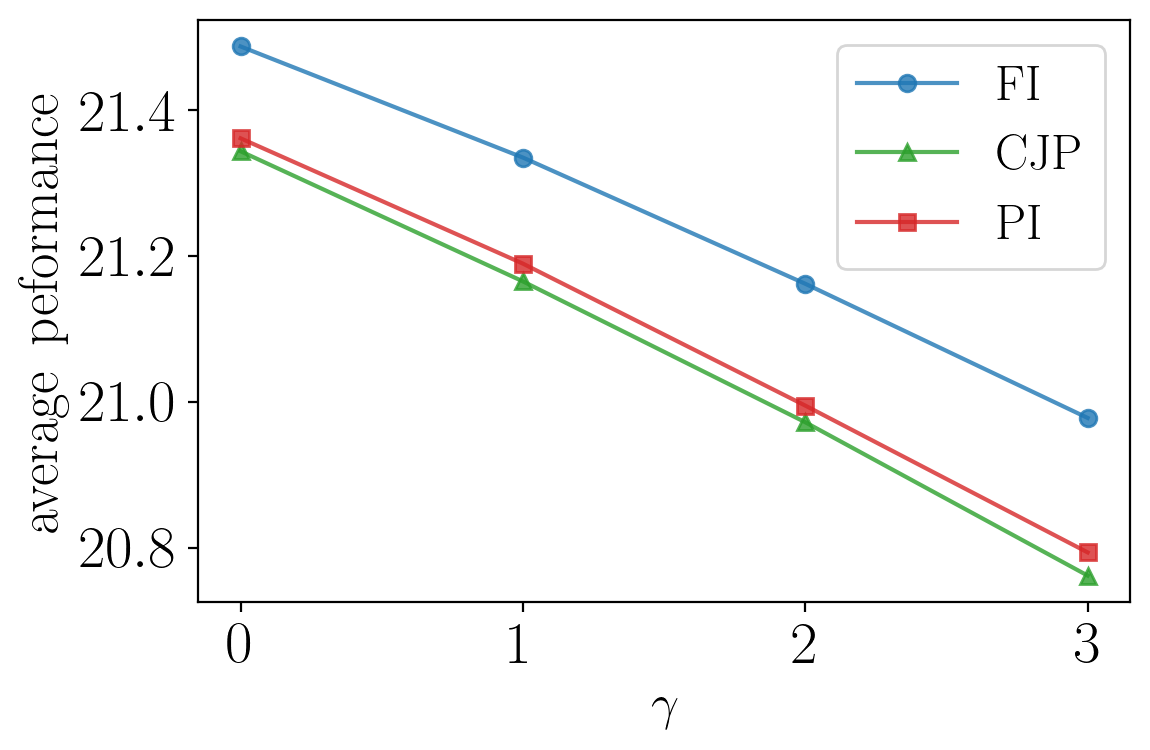

In [59]:
plt.figure(figsize=(6, 4))
plt.plot(gamma_values, PnL_table_FI_fd, label=r'$\mathrm{FI}$',alpha = 0.8, color='tab:blue', marker='o')
plt.plot(gamma_values, PnL_table_CJ_fd, label=r'$\mathrm{CJP}$',alpha = 0.8, color='tab:green', marker='^')
plt.plot(gamma_values, PnL_table_PI_fd, label=r'$\mathrm{PI}$',alpha = 0.8, color='tab:red', marker='s')

# Ajout des titres et légendes
plt.xlabel('$\gamma$', fontsize=fsL)
plt.ylabel('$\mathrm{average\;\,peformance}$', fontsize=fsL+2)
plt.legend(fontsize=fs)
plt.tight_layout()
plt.savefig('figures/PnL_gamma_fd.pdf', dpi = 300, format = 'pdf')
plt.show()

In [60]:
print(PnL_table_FI_g_fd)
print(PnL_table_CJ_g_fd)
print(PnL_table_PI_g_fd)

[(21.486749108888322, 4.9552727237736285), (21.33447889584047, 4.930240949697745), (21.16155816559368, 4.905605611508391), (20.977727024092626, 4.895938919006321)]
[(21.343139778485153, 4.95626027578727), (21.164794843349227, 4.928973034963214), (20.971806885031974, 4.913334489844708), (20.76173241079809, 4.903570792477454)]
[(21.36086571661908, 4.953946012062125), (21.189144728763765, 4.93262321907815), (20.994636457681406, 4.915074423443383), (20.793483529600227, 4.9079771534785674)]


# PnL as a function of $\psi$ and $\varphi$

In [61]:
mm_psi = {'p0': mm, 'p1': mm, 'p2':mm,'p3':mm,'p4':mm}
PnL_table_FI_fd = []
PnL_table_PI_fd = []
PnL_table_CJ_fd = []

PnL_table_FI_p_fd = []
PnL_table_PI_p_fd = []
PnL_table_CJ_p_fd = []

In [62]:
seed = 36457656
psi_pourcentage_psi_values = np.linspace(0,2,5)
pourc = np.linspace(0,1,5)
params_env_cop = params_env.copy()
params_env_cop['matrixCJ'] = np.array(mm_aux.get_delta_CJ_matrix())
for iq,psi_pourcentage_value in enumerate(psi_pourcentage_psi_values):
    params_aux = params_env_cop.copy()
    mm_aux = utils.mm_with_fads(**params_aux)
    mm_aux.varphi= mm_aux.varphi*(2-psi_pourcentage_value)
    mm_aux.psi=psi_pourcentage_value*mm_aux.psi
    mm_psi[f'p{iq}'] = mm_aux
    mm_psi[f'p{iq}'].ode_result=mm_psi[f'p{iq}'].ODE_solver(value_at_fundamental = True)

    np.random.seed(seed)
    PnL_val = mm_psi[f'p{iq}'].PnL(100_000,value_at_fundamental= True)
    #to plot
    PnL_table_FI_fd.append(mean_sd(PnL_val[0])[0])
    PnL_table_CJ_fd.append(mean_sd(PnL_val[1])[0])
    PnL_table_PI_fd.append(mean_sd(PnL_val[2])[0])
    
    #to put on the table 
    PnL_table_FI_p_fd.append(mean_sd(PnL_val[0]))
    PnL_table_CJ_p_fd.append(mean_sd(PnL_val[1]))
    PnL_table_PI_p_fd.append(mean_sd(PnL_val[2]))

999it [00:14, 69.50it/s]
999it [00:14, 69.39it/s]
999it [00:14, 68.66it/s]
999it [00:14, 68.85it/s]
999it [00:14, 70.96it/s]


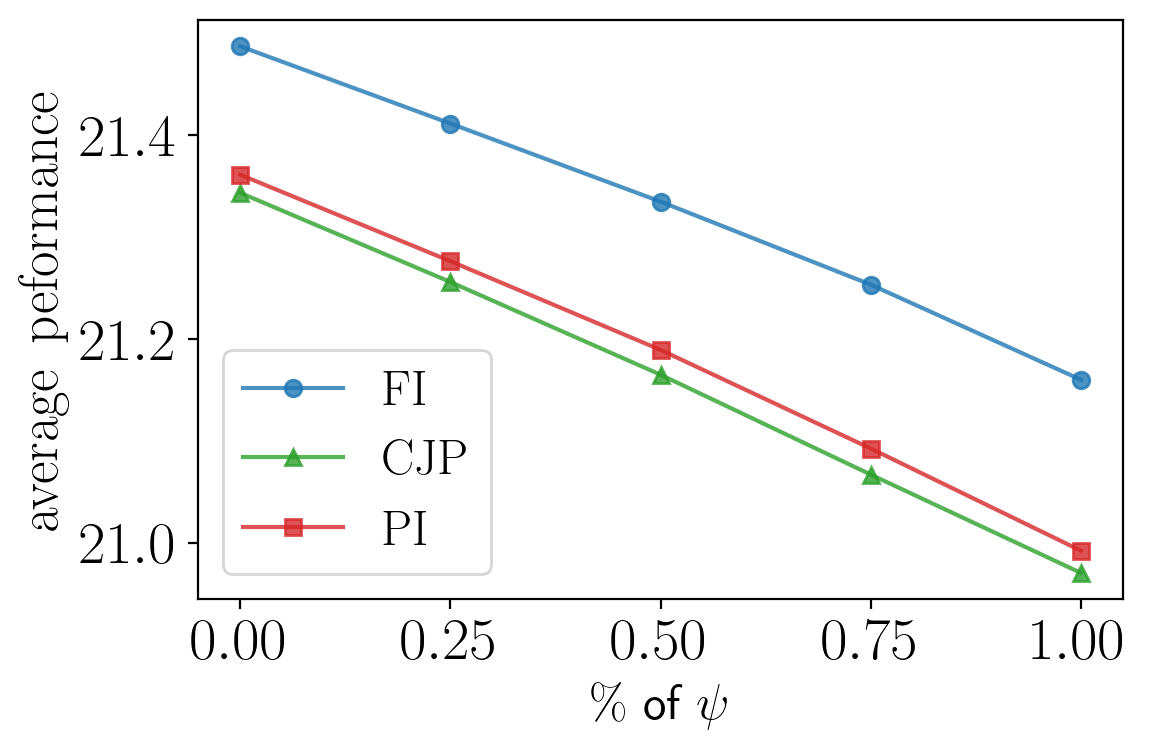

In [63]:
plt.figure(figsize=(6, 4))
plt.plot(pourc, PnL_table_FI_fd, label=r'$\mathrm{FI}$',alpha = 0.8, color='tab:blue', marker='o')
plt.plot(pourc, PnL_table_CJ_fd, label=r'$\mathrm{CJP}$',alpha = 0.8, color='tab:green', marker='^')
plt.plot(pourc, PnL_table_PI_fd, label=r'$\mathrm{PI}$',alpha = 0.8, color='tab:red', marker='s')

# Ajout des titres et légendes
plt.xlabel(r'$\%$ of $\psi$', fontsize=fsL)
plt.ylabel('$\mathrm{average\;\,peformance}$', fontsize=fsL+2)
plt.legend(fontsize=fs)
plt.tight_layout()
plt.savefig('figures/PnL_psi_fd.pdf', dpi = dpi, format = 'pdf')
plt.show()

In [64]:
print(PnL_table_FI_p_fd)
print(PnL_table_CJ_p_fd)
print(PnL_table_PI_p_fd)

[(21.486749108888322, 4.9552727237736285), (21.41106882935325, 4.942247424290861), (21.33447889584047, 4.930240949697745), (21.253087126968303, 4.913890394571472), (21.159867075204268, 4.905162568652982)]
[(21.343139778485153, 4.95626027578727), (21.25569792742966, 4.942990106087573), (21.164794843349227, 4.928973034963214), (21.066902433003428, 4.923166482625963), (20.97049777195021, 4.914352854758584)]
[(21.36086571661908, 4.953946012062125), (21.276100182635364, 4.942266965988684), (21.189144728763765, 4.93262321907815), (21.0924666302083, 4.925661301114687), (20.99230919452032, 4.91625299162896)]


# PnL as a function of $\eta$

In [65]:
mm_eta = {'e0': mm, 'e1': mm, 'e2':mm,'e3':mm, 'e3':mm}
PnL_table_FI_fd = []
PnL_table_PI_fd = []
PnL_table_CJ_fd = []

PnL_table_FI_e_fd = []
PnL_table_PI_e_fd = []
PnL_table_CJ_e_fd = []

In [66]:
seed = 36457656
eta_values = np.linspace(2.5,12.5,5)
params_env_cop = params_env.copy()
params_env_cop['matrixCJ'] = np.array(mm_aux.get_delta_CJ_matrix())
for iq,eta_value in enumerate(eta_values):
    params_aux = params_env_cop.copy()
    params_aux['eta'] = eta_value
    mm_aux = utils.mm_with_fads(**params_aux)
    mm_eta[f'e{iq}'] = mm_aux
    mm_eta[f'e{iq}'].ode_result=mm_eta[f'e{iq}'].ODE_solver(value_at_fundamental = True)

    np.random.seed(seed)
    PnL_val = mm_eta[f'e{iq}'].PnL(100_000, value_at_fundamental= True)
    #to plot
    PnL_table_FI_fd.append(mean_sd(PnL_val[0])[0])
    PnL_table_CJ_fd.append(mean_sd(PnL_val[1])[0])
    PnL_table_PI_fd.append(mean_sd(PnL_val[2])[0])
    
    #to put on the table 
    
    PnL_table_FI_e_fd.append(mean_sd(PnL_val[0]))
    PnL_table_CJ_e_fd.append(mean_sd(PnL_val[1]))
    PnL_table_PI_e_fd.append(mean_sd(PnL_val[2]))

999it [00:14, 69.70it/s]
999it [00:13, 71.84it/s]
999it [00:14, 70.74it/s]
999it [00:14, 69.46it/s]
999it [00:14, 69.08it/s]


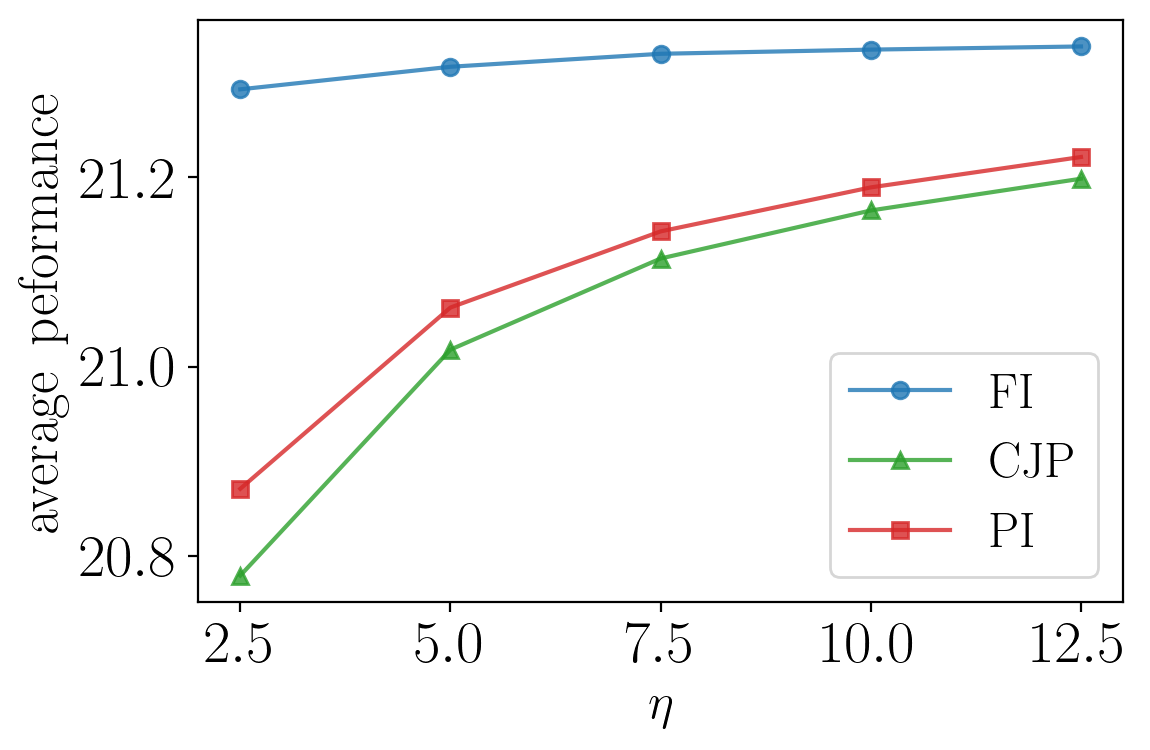

In [67]:
plt.figure(figsize=(6, 4))
plt.plot(eta_values, PnL_table_FI_fd, label=r'$\mathrm{FI}$',alpha = 0.8, color='tab:blue', marker='o')
plt.plot(eta_values, PnL_table_CJ_fd, label=r'$\mathrm{CJP}$',alpha = 0.8, color='tab:green', marker='^')
plt.plot(eta_values, PnL_table_PI_fd, label=r'$\mathrm{PI}$',alpha = 0.8, color='tab:red', marker='s')

# Ajout des titres et légendes
plt.xlabel('$\eta$', fontsize=fsL)
plt.ylabel('$\mathrm{average\;\,peformance}$', fontsize=fsL+2)
plt.legend(fontsize=fs)
plt.tight_layout()
plt.savefig('figures/PnL_eta_fd.pdf', dpi = 300, format = 'pdf')
plt.show()

In [68]:
print(PnL_table_FI_e_fd)
print(PnL_table_CJ_e_fd)
print(PnL_table_PI_e_fd)

[(21.29259438315421, 4.938826053370364), (21.316395269834693, 4.930547147221713), (21.330082220527707, 4.9305284894114285), (21.33447889584047, 4.930240949697745), (21.337816762056374, 4.929040962273478)]
[(20.77961067839696, 4.974446625551682), (21.017966736848184, 4.944240022009191), (21.114104823907002, 4.934434600027331), (21.164794843349227, 4.928973034963214), (21.198294408961626, 4.9286744078165565)]
[(20.871190099009507, 4.986528223004698), (21.0624111672322, 4.949307782816557), (21.142711204829848, 4.940482383116501), (21.189144728763765, 4.93262321907815), (21.221201827384494, 4.930302848804604)]


# Comparison table

In [69]:
PnL_FI_fd = {'qconst':PnL_table_FI_q_fd , 'gamma':PnL_table_FI_g_fd, 'eta':PnL_table_FI_e_fd,'psi':PnL_table_FI_p_fd}
PnL_PI_fd = {'qconst':PnL_table_PI_q_fd, 'gamma':PnL_table_PI_g_fd, 'eta':PnL_table_PI_e_fd,'psi':PnL_table_PI_p_fd}
PnL_CJ_fd = {'qconst':PnL_table_CJ_q_fd, 'gamma':PnL_table_CJ_g_fd, 'eta':PnL_table_CJ_e_fd,'psi':PnL_table_CJ_p_fd}

In [70]:
PnL_FI_fd

{'qconst': [(21.34269128082771, 5.100084776665097),
  (21.341691910389514, 5.082593360456416),
  (21.34107177025052, 5.026412647021497),
  (21.33447889584047, 4.930240949697745),
  (21.32685041330658, 4.790418181873543),
  (21.325860402423622, 4.600421388773463)],
 'gamma': [(21.486749108888322, 4.9552727237736285),
  (21.33447889584047, 4.930240949697745),
  (21.16155816559368, 4.905605611508391),
  (20.977727024092626, 4.895938919006321)],
 'eta': [(21.29259438315421, 4.938826053370364),
  (21.316395269834693, 4.930547147221713),
  (21.330082220527707, 4.9305284894114285),
  (21.33447889584047, 4.930240949697745),
  (21.337816762056374, 4.929040962273478)],
 'psi': [(21.486749108888322, 4.9552727237736285),
  (21.41106882935325, 4.942247424290861),
  (21.33447889584047, 4.930240949697745),
  (21.253087126968303, 4.913890394571472),
  (21.159867075204268, 4.905162568652982)]}

In [71]:
PnL_CJ_fd

{'qconst': [(21.34229278810565, 5.098855495716015),
  (21.32017834350939, 5.082118053220939),
  (21.263627685793598, 5.025083606660183),
  (21.164794843349227, 4.928973034963214),
  (21.028772046616332, 4.794216417621746),
  (20.85846132212667, 4.607469114085826)],
 'gamma': [(21.343139778485153, 4.95626027578727),
  (21.164794843349227, 4.928973034963214),
  (20.971806885031974, 4.913334489844708),
  (20.76173241079809, 4.903570792477454)],
 'eta': [(20.77961067839696, 4.974446625551682),
  (21.017966736848184, 4.944240022009191),
  (21.114104823907002, 4.934434600027331),
  (21.164794843349227, 4.928973034963214),
  (21.198294408961626, 4.9286744078165565)],
 'psi': [(21.343139778485153, 4.95626027578727),
  (21.25569792742966, 4.942990106087573),
  (21.164794843349227, 4.928973034963214),
  (21.066902433003428, 4.923166482625963),
  (20.97049777195021, 4.914352854758584)]}

In [72]:
PnL_PI_fd

{'qconst': [(21.34269128082771, 5.100084776665097),
  (21.322028520049017, 5.084121741506764),
  (21.268583235814617, 5.025295949753533),
  (21.189144728763765, 4.93262321907815),
  (21.12048053658562, 4.794190421068252),
  (21.32586040242363, 4.600421388773462)],
 'gamma': [(21.36086571661908, 4.953946012062125),
  (21.189144728763765, 4.93262321907815),
  (20.994636457681406, 4.915074423443383),
  (20.793483529600227, 4.9079771534785674)],
 'eta': [(20.871190099009507, 4.986528223004698),
  (21.0624111672322, 4.949307782816557),
  (21.142711204829848, 4.940482383116501),
  (21.189144728763765, 4.93262321907815),
  (21.221201827384494, 4.930302848804604)],
 'psi': [(21.36086571661908, 4.953946012062125),
  (21.276100182635364, 4.942266965988684),
  (21.189144728763765, 4.93262321907815),
  (21.0924666302083, 4.925661301114687),
  (20.99230919452032, 4.91625299162896)]}

# Computation of PDE

# Comparison between approximation

In [112]:
mm_qconst = {'q0': mm}

In [113]:
q_const_value = 0.6
params_aux = params_env.copy()
params_aux['qconst'] = q_const_value
params_aux['U_max'] = 1
params_aux['N_u'] = 50
params_aux['q_bar'] = 50
mm_aux = utils.mm_with_fads(**params_aux)
mm_qconst[f'q{0}'] = mm_aux

In [114]:
plt.rcParams["font.size"] = fs

In [115]:
cmap = plt.get_cmap("viridis")
norm = Normalize(vmin=min(mm.q_vector), vmax=max(mm.q_vector))
sm = ScalarMappable(norm=norm, cmap=cmap)

delta_a_m, delta_b_m, delta_a___m, delta_b___m = mm_qconst[f'q0'].get_deltas_FI()

In [116]:
psi = 14.87
mu = 0
varphi = 15
k = 1
gamma = 1
phi = 0.1
alpha = 0.001
sigma = 1 
qconst = 0.6
eta = 10
Nt = 1000
T = 1
Nu = 50
U = 1
delta_t = T/Nt
delta_u = 2*U/Nu
q_bar = 50
Nq = 2 * q_bar + 1
qvector = np.linspace(-q_bar  , q_bar, 2 * q_bar + 1) 
uvector = np.linspace(-U, U, Nu)    

In [117]:
def PDE():
    V = np.zeros((Nt,Nq,Nu))
    V[-1,:,:] = - alpha* qvector[:,None]**2
    for t in range(Nt-2,-1,-1):
        for q in range(1,Nq-1):
            for u in range(1,Nu-1):
                dV_du = (V[t+1,q,u+1]-V[t+1,q,u-1])/(2*delta_u)
                dV_duu = (V[t+1,q,u+1]+V[t+1,q,u-1]-2*V[t+1,q,u])/(delta_u**2)
                exp_plus = 1/k * np.exp(-1 + k * (V[t+1,q+1,u]-V[t+1,q,u]))
                exp_minus = 1/k * np.exp(-1 + k * (V[t+1,q-1,u]-V[t+1,q,u]))
                V[t,q,u] = V[t+1,q,u] + delta_t * (-eta* uvector[u]*dV_du - phi*qvector[q]**2 + 1/2*dV_duu + (mu - eta*sigma*
                            qconst*uvector[u])*qvector[q] + exp_minus*(varphi + psi*np.exp(-gamma*sigma*qconst*uvector[u]))+
                                        exp_plus*(varphi + psi*np.exp(gamma*sigma*qconst*uvector[u])))
    return V                

## Test V2 PDE solver

In [118]:
def PDE_V2():
    V = np.zeros((Nt, Nq, Nu))
    V[-1, :, :] = -alpha * qvector[:, None]**2  # Condition finale
    
    for t in range(Nt - 2, -1, -1):
        for q in range(Nq):
            for u in range(1, Nu - 1):
                dV_du = (V[t + 1, q, u + 1] - V[t + 1, q, u - 1]) / (2 * delta_u)
                dV_duu = (V[t + 1, q, u + 1] + V[t + 1, q, u - 1] - 2 * V[t + 1, q, u]) / (delta_u**2)
                
                if q + 1 < Nq:
                    exp_plus = (1 / k) * np.exp(-1 + k * (V[t + 1, q + 1, u] - V[t + 1, q, u]))
                else:
                    exp_plus = 0  # Gestion du bord supérieur
                
                if q - 1 >= 0:
                    exp_minus = (1 / k) * np.exp(-1 + k * (V[t + 1, q - 1, u] - V[t + 1, q, u]))
                else:
                    exp_minus = 0  # Gestion du bord inférieur
                
                V[t, q, u] = V[t + 1, q, u] + delta_t * (
                    -eta * uvector[u] * dV_du - phi * qvector[q]**2 
                    + 0.5 * dV_duu + (mu - eta * sigma * qconst * uvector[u]) * qvector[q]
                    + exp_minus * (varphi + psi * np.exp(-gamma * sigma * qconst * uvector[u]))
                    + exp_plus * (varphi + psi * np.exp(gamma * sigma * qconst * uvector[u]))
                )
        
        # Gestion des conditions aux bords (Neumann ici)
        V[t, :, 0] = V[t, :, 1]
        V[t, :, Nu - 1] = V[t, :, Nu - 2]
    
    return V

In [119]:
def quotes(V):
    delta_a = np.zeros((Nt, Nq,Nu))
    delta_b = np.zeros((Nt, Nq,Nu))
    for u in range(Nu):
        for q in range(Nq-1):
            delta_b[:,q,u] = 1/k - V[:,q+1,u] + V[:,q,u]
    for u in range(Nu):
        for q in range(1,Nq):
            delta_a[:, q, u] = 1 /k - V[:, q-1, u] + V[:, q, u]
    return delta_a,delta_b

In [120]:
#delta_a,delta_b = quotes(PDE())

In [121]:
delta_a,delta_b = quotes(PDE_V2())

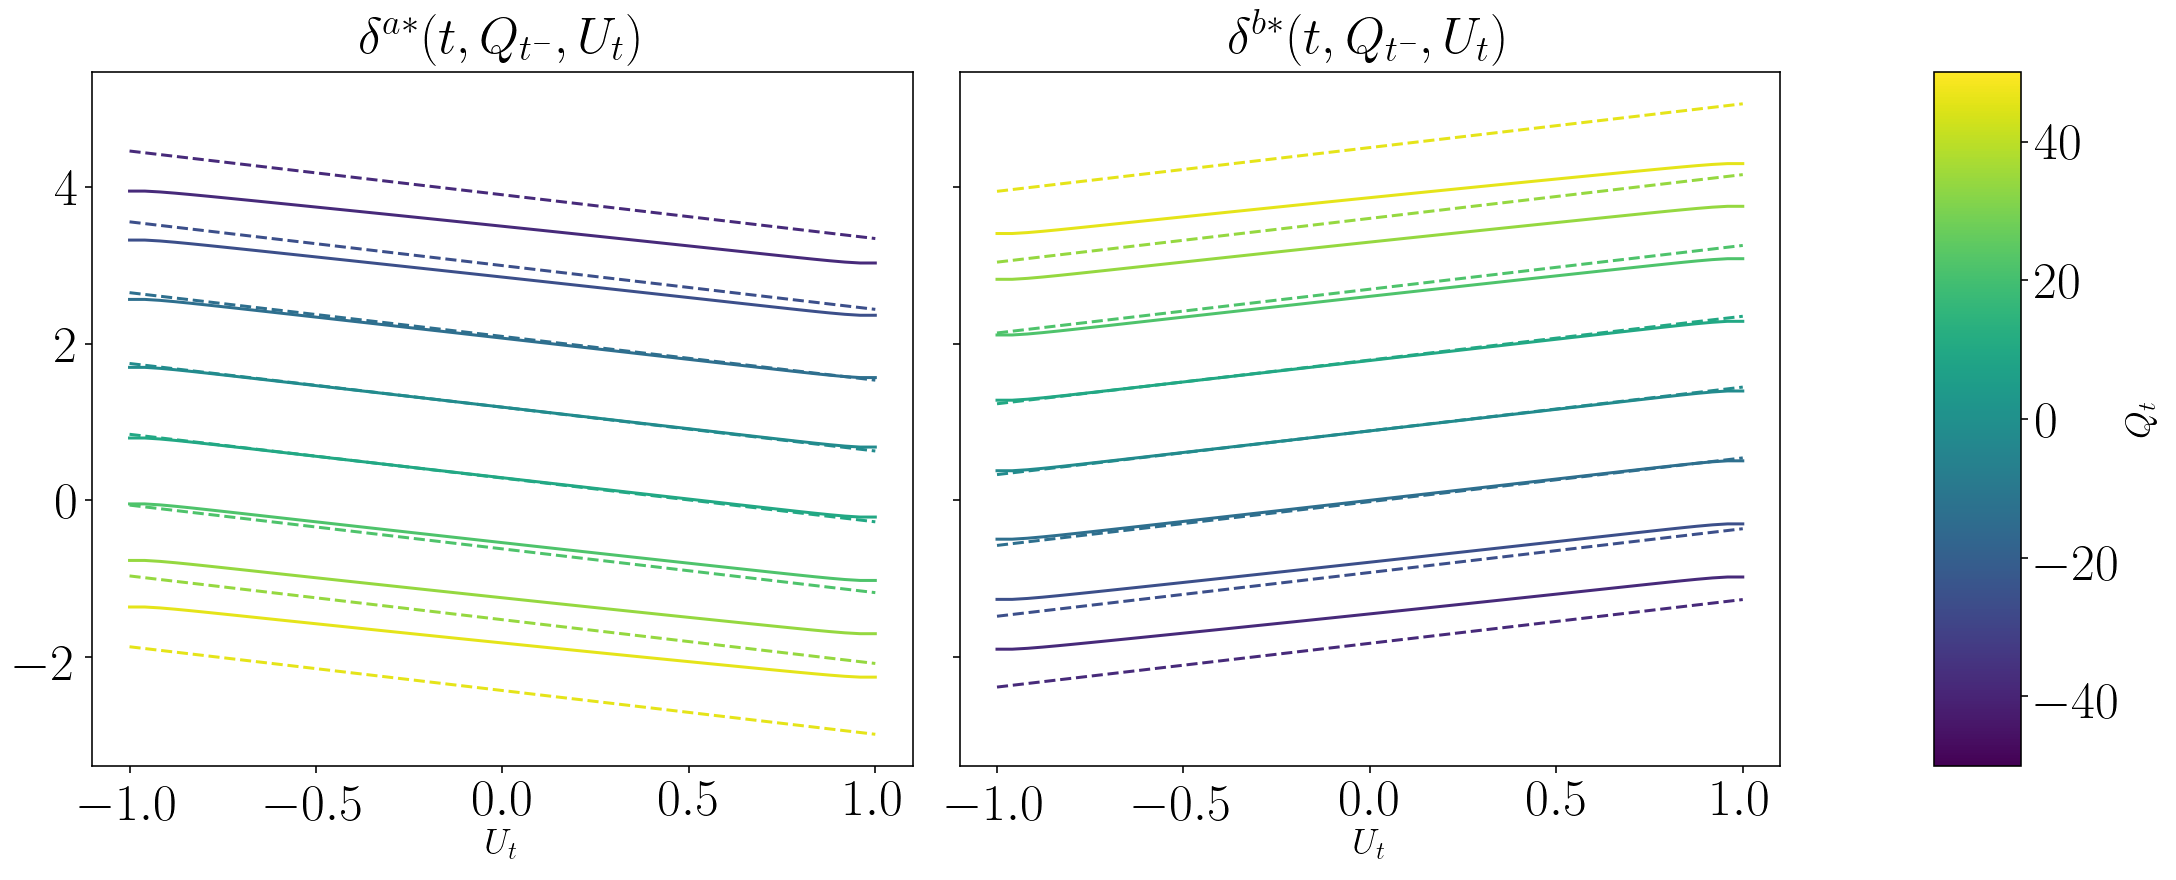

In [127]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=True, constrained_layout=True)
cmap = plt.get_cmap("viridis")
norm = Normalize(vmin=min(mm.q_vector), vmax=max(mm.q_vector))
sm = ScalarMappable(norm=norm, cmap=cmap)

for q in range(1,Nq-1):
    if q%int(mm.q_bar/4) ==0 :
        color = cmap(norm(mm.q_vector[q]))
        ax[0].plot(uvector, delta_a[int(Nt/2), q, :],  color=color)
        ax[0].plot(uvector, delta_a_m[int(Nt/2), :, q], '--', color=color)
        
        ax[1].plot(uvector, delta_b[int(Nt/2), q, :],  color=color)
        ax[1].plot(uvector, delta_b_m[int(Nt/2), :, q], '--', color=color)

for i in range(2):
    ax[i].set_xlabel(r'${U}_t$', fontsize = fsL )
    #ax[i].set_ylim(-1, 3)
    #ax[i].set_xlim(-2,2)
ax[0].set_title(r'$\delta^{a*}(t,Q_{t^-},{U}_t)$')
ax[1].set_title(r'$\delta^{b*}(t,Q_{t^-},{U}_t)$')
#ax[0].set_ylabel(r'$\delta^{a*,b*}(t,Q_{t^-},{U}_t)$', fontsize = fsL)
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.05, pad=0.08)
cbar.set_label(r'$Q_t$', fontsize = fsL)
#plt.xlim(-.5,.5)
plt.savefig('figures/deltas_a_b_PDE.pdf', format="pdf", dpi=dpi)
plt.show()

# Figures 

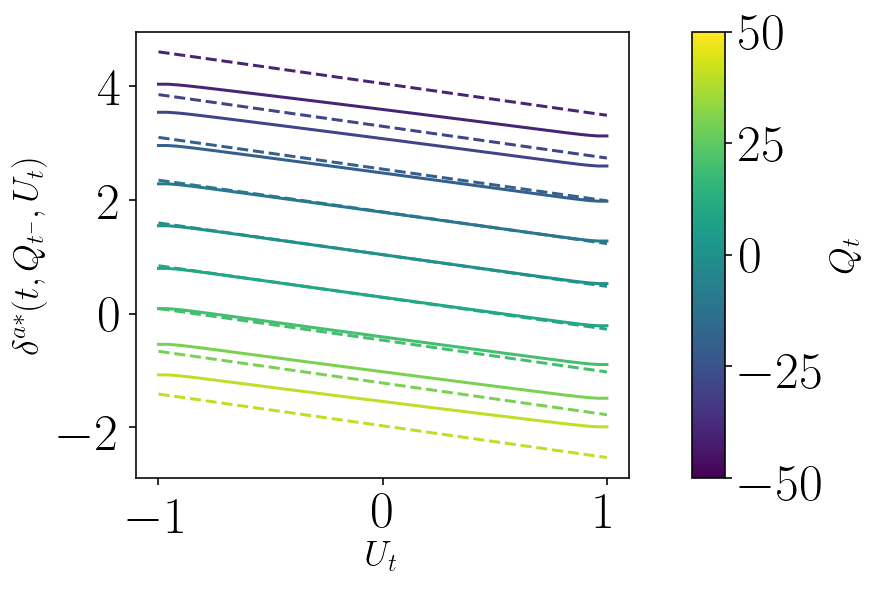

In [125]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), sharey=True, constrained_layout=True)
cmap = plt.get_cmap("viridis")
norm = Normalize(vmin=min(mm.q_vector), vmax=max(mm.q_vector))
sm = ScalarMappable(norm=norm, cmap=cmap)

for q in range(1,Nq-1):
    if q%int(mm.q_bar/5) ==0 :
        color = cmap(norm(mm.q_vector[q]))
        ax.plot(uvector, delta_a[int(Nt/2), q, :],  color=color)
        ax.plot(uvector, delta_a_m[int(Nt/2), :, q], '--', color=color)
        
ax.set_ylabel(r'$\delta^{a*}(t,Q_{t^-},{U}_t)$', fontsize = fsL)
ax.set_xlabel(r'${U}_t$', fontsize=fsL)
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.05, pad=0.08)
cbar.set_label(r'$Q_t$', fontsize = fsL)
#plt.xlim(-.5,.5)
plt.savefig('figures/deltas_a_PDE.pdf', format="pdf", dpi=dpi)
plt.show()

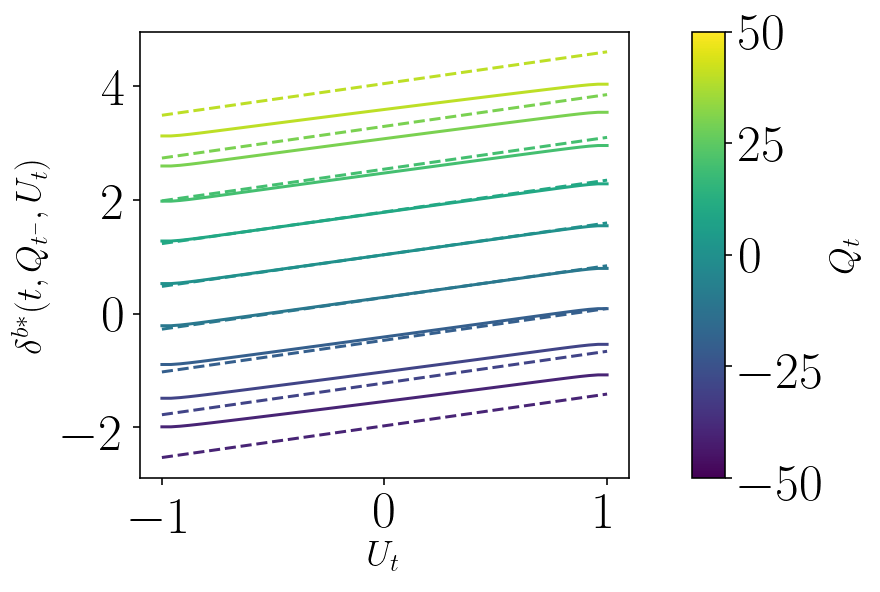

In [126]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), sharey=True, constrained_layout=True)
cmap = plt.get_cmap("viridis")
norm = Normalize(vmin=min(mm.q_vector), vmax=max(mm.q_vector))
sm = ScalarMappable(norm=norm, cmap=cmap)

for q in range(1,Nq-1):
    if q%int(mm.q_bar/5) ==0 :
        color = cmap(norm(mm.q_vector[q]))
        ax.plot(uvector, delta_b[int(Nt/2), q, :],  color=color)
        ax.plot(uvector, delta_b_m[int(Nt/2), :, q], '--', color=color)
        
ax.set_ylabel(r'$\delta^{b*}(t,Q_{t^-},{U}_t)$', fontsize = fsL)
ax.set_xlabel(r'${U}_t$', fontsize=fsL)
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.05, pad=0.08)
cbar.set_label(r'$Q_t$', fontsize = fsL)
#plt.xlim(-.5,.5)
plt.savefig('figures/deltas_b_PDE.pdf', format="pdf", dpi=dpi)
plt.show()